## Importing the required libraries

In [1]:
# library required for structured Python code

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Library required to suppress any warning messages
import warnings

warnings.filterwarnings("ignore")

# Libraries required for data analysis and visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)  # adds background to the graph

# Remove the limit for number of displayed columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [3]:
# Library to split the data
from sklearn.model_selection import train_test_split

# Library to build Logistic Regression model
from sklearn.linear_model import LogisticRegression

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Library to build Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Library to tune different decision tree models
from sklearn.model_selection import GridSearchCV

# Library to get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Load dataset

In [4]:
loan = pd.read_csv("Loan_Modelling.csv", index_col=0)  # set the first column as index

<IPython.core.display.Javascript object>

In [5]:
data = loan.copy()  # creating a copy of the dataset

<IPython.core.display.Javascript object>

## Data Structure Analysis

In [6]:
# Viewing top 10 observations from the dataset

data.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0


<IPython.core.display.Javascript object>

- ID is set as the index
- Zipcode can be restructured into City/County for easy analysis
- Mortgage has many 0's and 3 digit number indicating a skewed data
- Personal_Loan, Scurities_Account, CD_Account, Online and CreditCard are all binary values
- Family and Education are under 5
- Age, Experience and Income indicate a wide range of numbers

In [7]:
# Checking the shape of the dataset

data.shape

(5000, 13)

<IPython.core.display.Javascript object>

- There are 5000 rows and 13 columns in all

In [8]:
# Viewing the overall information of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


<IPython.core.display.Javascript object>

- No missing values listed
- 1 float and 12 int type columns
- memory used is 546.9 KB

In [9]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

- No null values present

In [10]:
data.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

<IPython.core.display.Javascript object>

- This gives an idea about the number of unique values in each column

# Initial Data Processing

In [11]:
# library required to convert zipcode to county

from uszipcode import SearchEngine

# User defined function to do the same


def zipcode_to_county(zipc):
    search = SearchEngine()
    zipcode = search.by_zipcode(zipc)
    return zipcode.county

<IPython.core.display.Javascript object>

In [12]:
# Applying the user defined function and creating a new column 'County'

data["County"] = data["ZIPCode"].apply(zipcode_to_county)

<IPython.core.display.Javascript object>

In [13]:
data.head(10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
ID,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0,San Diego County
7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0,Los Angeles County
8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1,Monterey County
9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0,Los Angeles County


<IPython.core.display.Javascript object>

In [14]:
data.nunique()

Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
County                 38
dtype: int64

<IPython.core.display.Javascript object>

- 467 unique values in ZIPCode decreased to 38 unique values in 'County'

In [15]:
# Making a list of columns

cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "Family",
        "CCAvg",
        "Education",
        "Mortgage",
        "Personal_Loan",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
        "County",
    ]
]

<IPython.core.display.Javascript object>

In [16]:
# Printing top 5 unique values in each column

for i in cols:
    print("\nUnique values in", i, "are :")
    print(data[i].value_counts().head())
    print("\n")
    print("-" * 40)


Unique values in Age are :
35    151
43    149
52    145
58    143
54    143
Name: Age, dtype: int64


----------------------------------------

Unique values in Experience are :
32    154
20    148
9     147
5     146
23    144
Name: Experience, dtype: int64


----------------------------------------

Unique values in Income are :
44    85
38    84
81    83
41    82
39    81
Name: Income, dtype: int64


----------------------------------------

Unique values in Family are :
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


----------------------------------------

Unique values in CCAvg are :
0.3    241
1.0    231
0.2    204
2.0    188
0.8    187
Name: CCAvg, dtype: int64


----------------------------------------

Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64


----------------------------------------

Unique values in Mortgage are :
0     3462
98      17
89      16
91      16
83      16
Name: Mortgage, dtype: int64



<IPython.core.display.Javascript object>

- 0's out-number 1 in Mortgage, Personal_Loan, Securities_Account, CD_Account and CreditCard coulmns
- Large number of observations for Los Angeles County

In [17]:
# Printing bottom 5 unique values in each column

for i in cols:
    print("\nUnique values in", i, "are :")
    print(data[i].value_counts().tail())
    print("\n")
    print("-" * 40)


Unique values in Age are :
25    53
24    28
66    24
23    12
67    12
Name: Age, dtype: int64


----------------------------------------

Unique values in Experience are :
-1     33
-2     15
 42     8
-3      4
 43     3
Name: Experience, dtype: int64


----------------------------------------

Unique values in Income are :
202    2
189    2
203    2
218    1
224    1
Name: Income, dtype: int64


----------------------------------------

Unique values in Family are :
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


----------------------------------------

Unique values in CCAvg are :
5.33    1
8.20    1
3.67    1
9.30    1
8.90    1
Name: CCAvg, dtype: int64


----------------------------------------

Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64


----------------------------------------

Unique values in Mortgage are :
206    1
210    1
258    1
278    1
635    1
Name: Mortgage, dtype: int64


-------------------

<IPython.core.display.Javascript object>

- There are negative values in 'Experience' that needs to be fixed
- There are counties under 5 observations as opposed to Los Angeles County with 1095 observations

In [18]:
data[data["Experience"] < 0].value_counts().sum()

51

<IPython.core.display.Javascript object>

- Overall 51 rows with negative experience

In [19]:
data[data["Experience"] < 0].sort_values(by=["Experience"], ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
ID,,,,,,,,,,,,,,
4515,24,-3,41,91768,4,1.00,3,0,0,0,0,1,0,Los Angeles County
2619,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0,Orange County
4286,23,-3,149,93555,2,7.20,1,0,0,0,0,1,0,Kern County
3627,24,-3,28,90089,4,1.00,3,0,0,0,0,0,0,Los Angeles County
2718,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1,Lake County
2877,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0,Los Angeles County
3131,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1,San Diego County
2467,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0,San Francisco County
3797,24,-2,50,94920,3,2.40,2,0,0,1,0,0,0,Marin County


<IPython.core.display.Javascript object>

- There are 51 rows with negative values for 'Experience
- Let's look at the corresponding Age, Education and Income values for any visible pattern

In [20]:
data[data["Experience"] < 0]["Age"].value_counts()

25    18
24    17
23    12
29     3
26     1
28     1
Name: Age, dtype: int64

<IPython.core.display.Javascript object>

In [21]:
data[data["Experience"] < 0]["Education"].value_counts()

3    20
1    16
2    16
Name: Education, dtype: int64

<IPython.core.display.Javascript object>

In [22]:
data[data["Experience"] < 0]["Income"].value_counts()

82     3
35     2
50     2
39     2
38     2
101    2
48     2
113    2
149    2
80     2
81     2
13     2
12     2
75     2
53     1
43     1
51     1
61     1
118    1
55     1
112    1
125    1
109    1
44     1
21     1
41     1
40     1
139    1
135    1
28     1
150    1
78     1
73     1
71     1
45     1
69     1
62     1
Name: Income, dtype: int64

<IPython.core.display.Javascript object>

- Considering the corresponding Age, Education and Income values, there does not seem to be any pattern and hence the negative values in Experience could most probably be a data entry error. Therefore will convert these values to absolute values instead of treating them as missing values.

In [23]:
# User defined function to convert negative values to absolute values


def exp(val):
    if val < 0:
        return np.abs(val)
    else:
        return val

<IPython.core.display.Javascript object>

In [24]:
data["Experience"] = data["Experience"].apply(exp)

<IPython.core.display.Javascript object>

In [25]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

<IPython.core.display.Javascript object>

- No more negative values in 'Experience'

In [26]:
# Checking the statisticsl summary of the dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

- 5000 observations present in all
- The min and max values indicate a widely spread in Age, Experience, Income and Mortgage
- Differences between mean and median values indicate skewness in the data

# Exploratory Data Analysis

## Univariate Analysis

In [27]:
# Defining a method to print the value counts in the plots


def val_count(plot, feature):
    for p in ax.patches:
        ax.annotate(  # annotate the count
            p.get_height(),
            (
                p.get_x() + p.get_width() / 2.0,  # calculating the value counts
                p.get_height(),
            ),
            ha="center",  # horizontal alignment of the text
            va="center",  # vertical alignment
            xytext=(0, 5),  # text position
            textcoords="offset points",  # offset in points from the xy value
        )

<IPython.core.display.Javascript object>

In [36]:
# Defing a method to print the percentage of data points in the plot


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [28]:
# Defining a method to plot histogram and boxplot combined in a single plot


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="green"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(nor
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [29]:
# setting the color palette for the plots

sns.set(palette="nipy_spectral")

<IPython.core.display.Javascript object>

### 1. Age

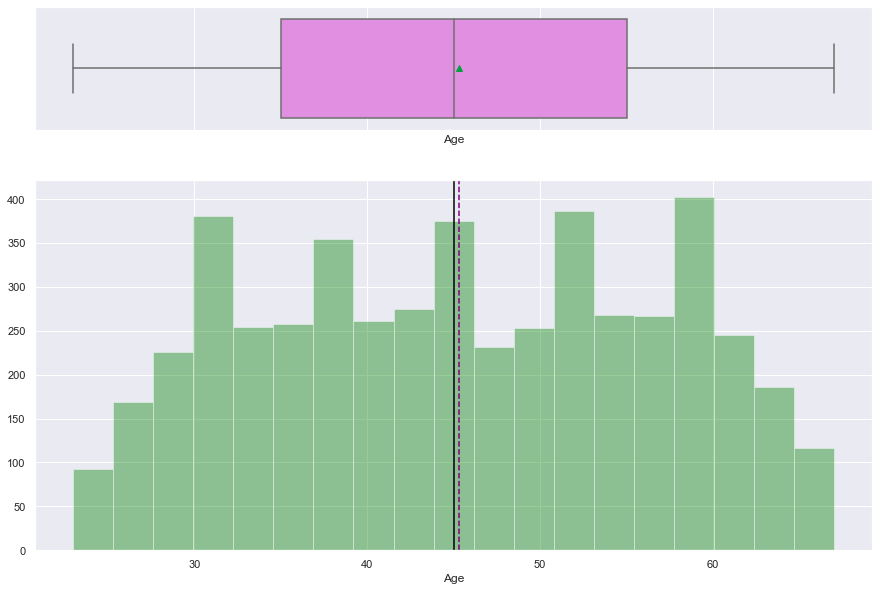

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data["Age"])

- The histogram indicates a uniform distribution with 5 peak values
- Mean and median are very close to each other
- The boxplot indicates no outliers

### 2. Experience

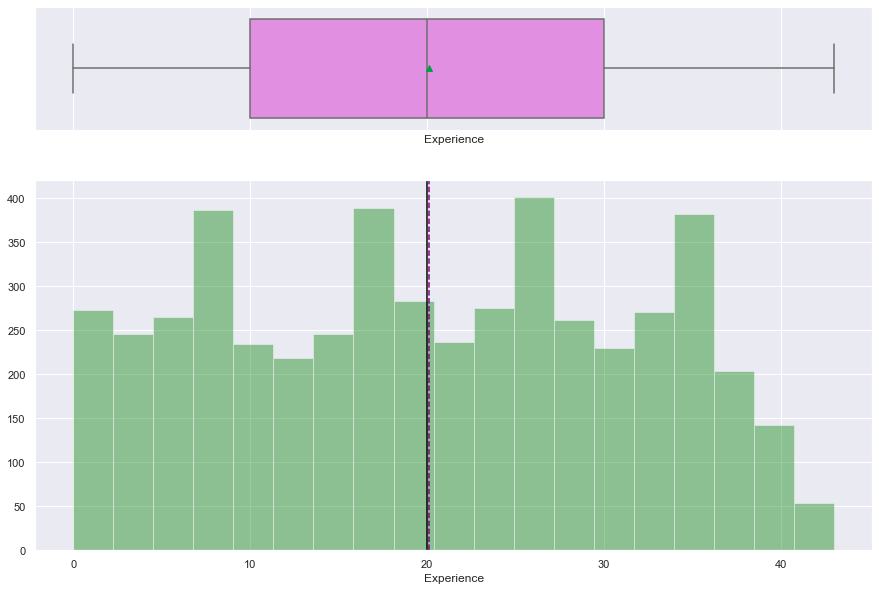

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data["Experience"])

- The histogram shows a uniform distribution with 5 peak values
- Mean and median are same
- Boxplot show no outliers

### 3. Income

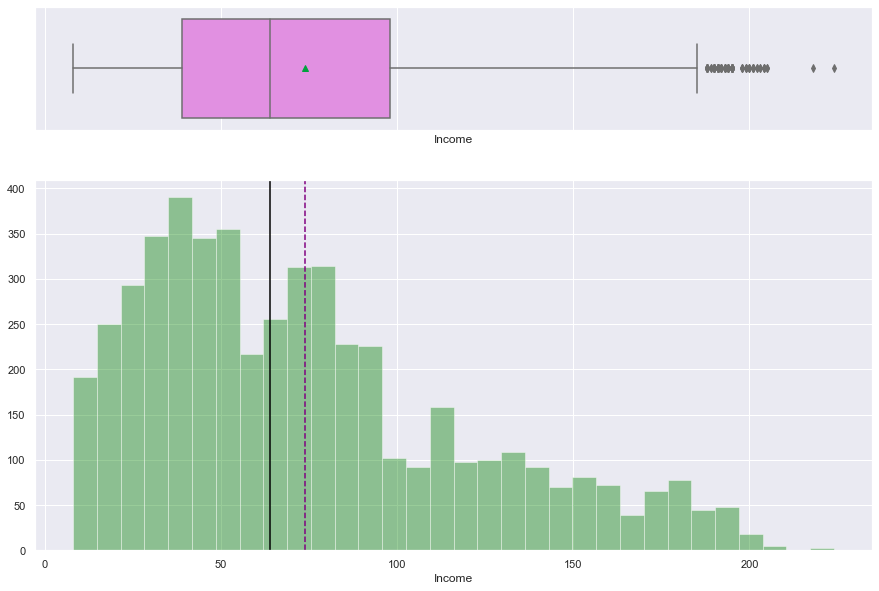

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(data["Income"])

- The distribution is right skewed
- Outliers spotted above the upper whisker in the boxplot

### 4. Family

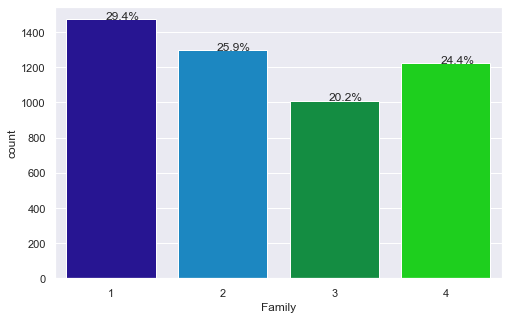

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data["Family"])
perc_on_bar(ax, data["Family"])

- Maximum number of customers are with a family size of 1
- Followed by 2 and 4 in the family
- Least among the family size is 3

### 5. Credit Card Average

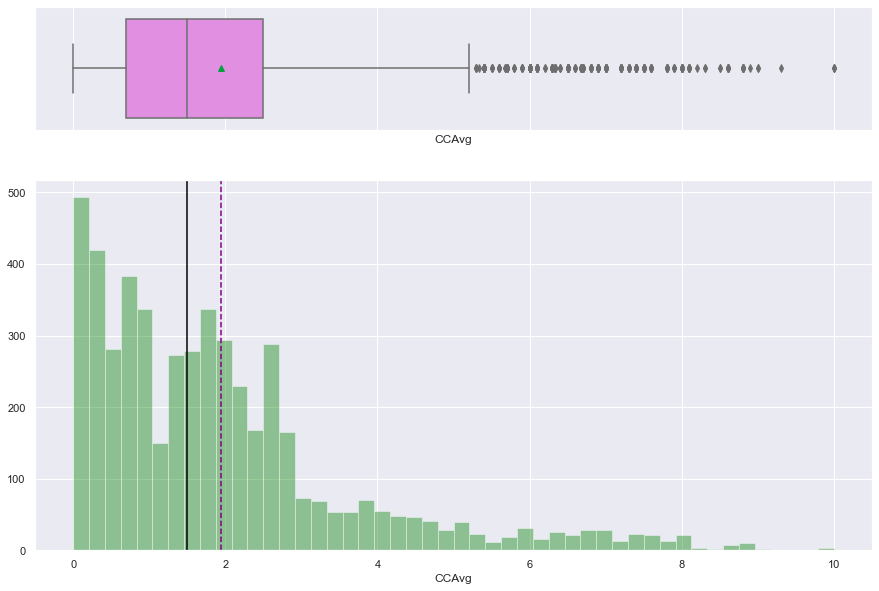

<IPython.core.display.Javascript object>

In [38]:
histogram_boxplot(data["CCAvg"])

- Right skewed data
- Outliers above the upper whisker

### 6. Education

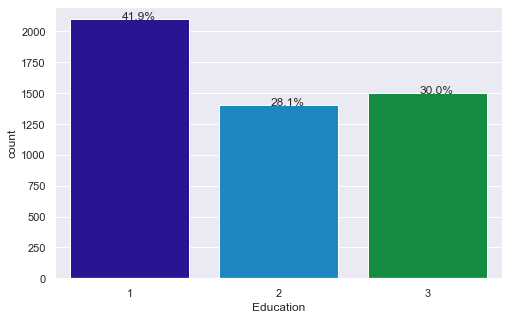

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data["Education"])
perc_on_bar(ax, data["Education"])

- Highest percentage of customer are Under Grads
- About 30% of them are Advanced/Professionals
- About 28% of the customers are Graduates
- The distribution suggests that 'Education' can be treated as a 'category'

### 7. Mortgage

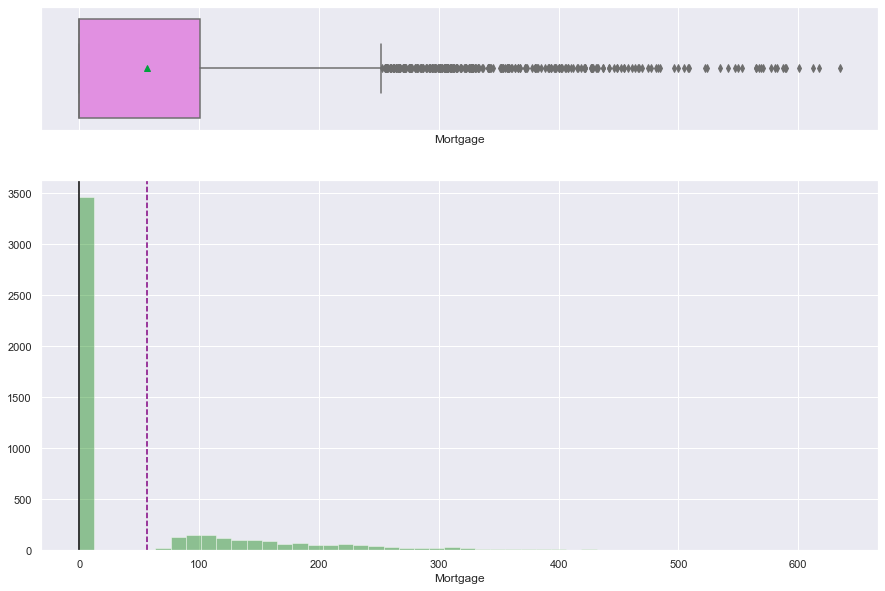

<IPython.core.display.Javascript object>

In [40]:
histogram_boxplot(data["Mortgage"])

- Maximum number of customers do not have mortgage
- Highly skewed towards '0'
- Outliers spotted above the upper whisker
- Must do further analysis to determine if 'Mortgage' can also be treated as category.

### 8. Personal Loan

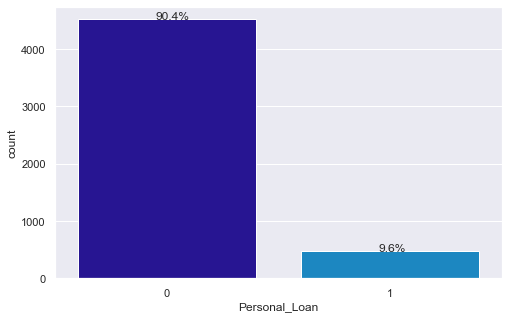

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data["Personal_Loan"])
perc_on_bar(ax, data["Personal_Loan"])

- Around 90% of the customers did not accept the personal loan offered in the previous campaign
- Whereas only 9.6% of customers have accepted the personal loan

### 9. Securities Account

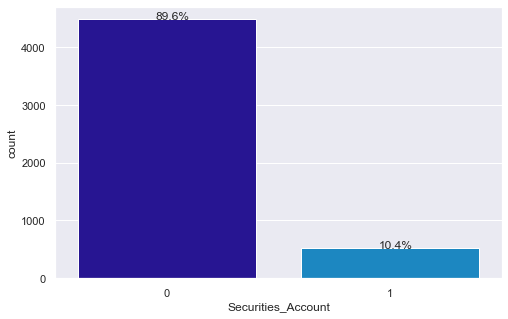

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data["Securities_Account"])
perc_on_bar(ax, data["Securities_Account"])

- Only 10.4% of the customers hold a securities account whereas, majority of the customers don't

### 10. Certificate of Deposit Account

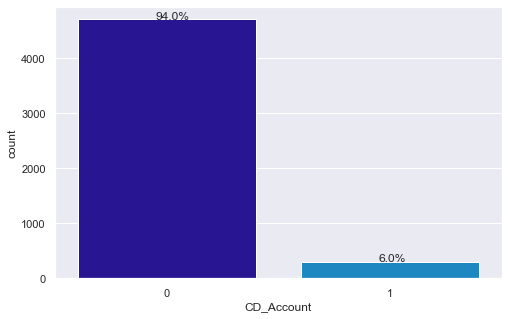

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data["CD_Account"])
perc_on_bar(ax, data["CD_Account"])

- Only 6% of the customers hold a CD account whereas, 94% of the customers don't

### 11. Online

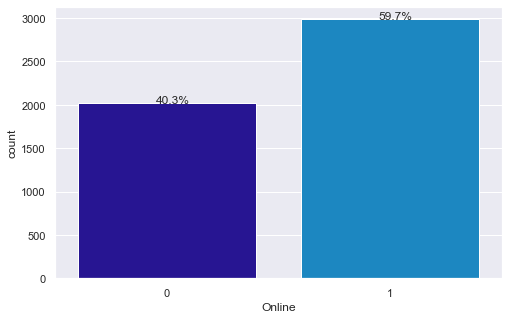

<IPython.core.display.Javascript object>

In [44]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data["Online"])
perc_on_bar(ax, data["Online"])

- 59.7% of the customers utilise internet banking facilities while 40.3% of them don't

### 12. Credit Card

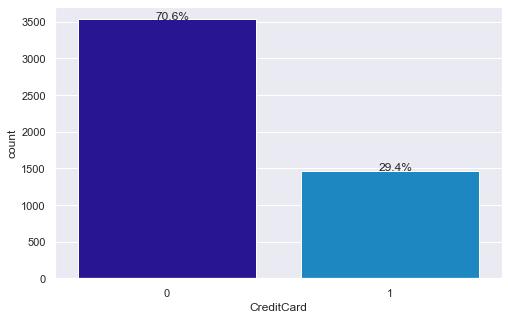

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data["CreditCard"])
perc_on_bar(ax, data["CreditCard"])

- 29.4% of customers use a credit card issued by other banks while 70.6% of the customers don't

## 13. County

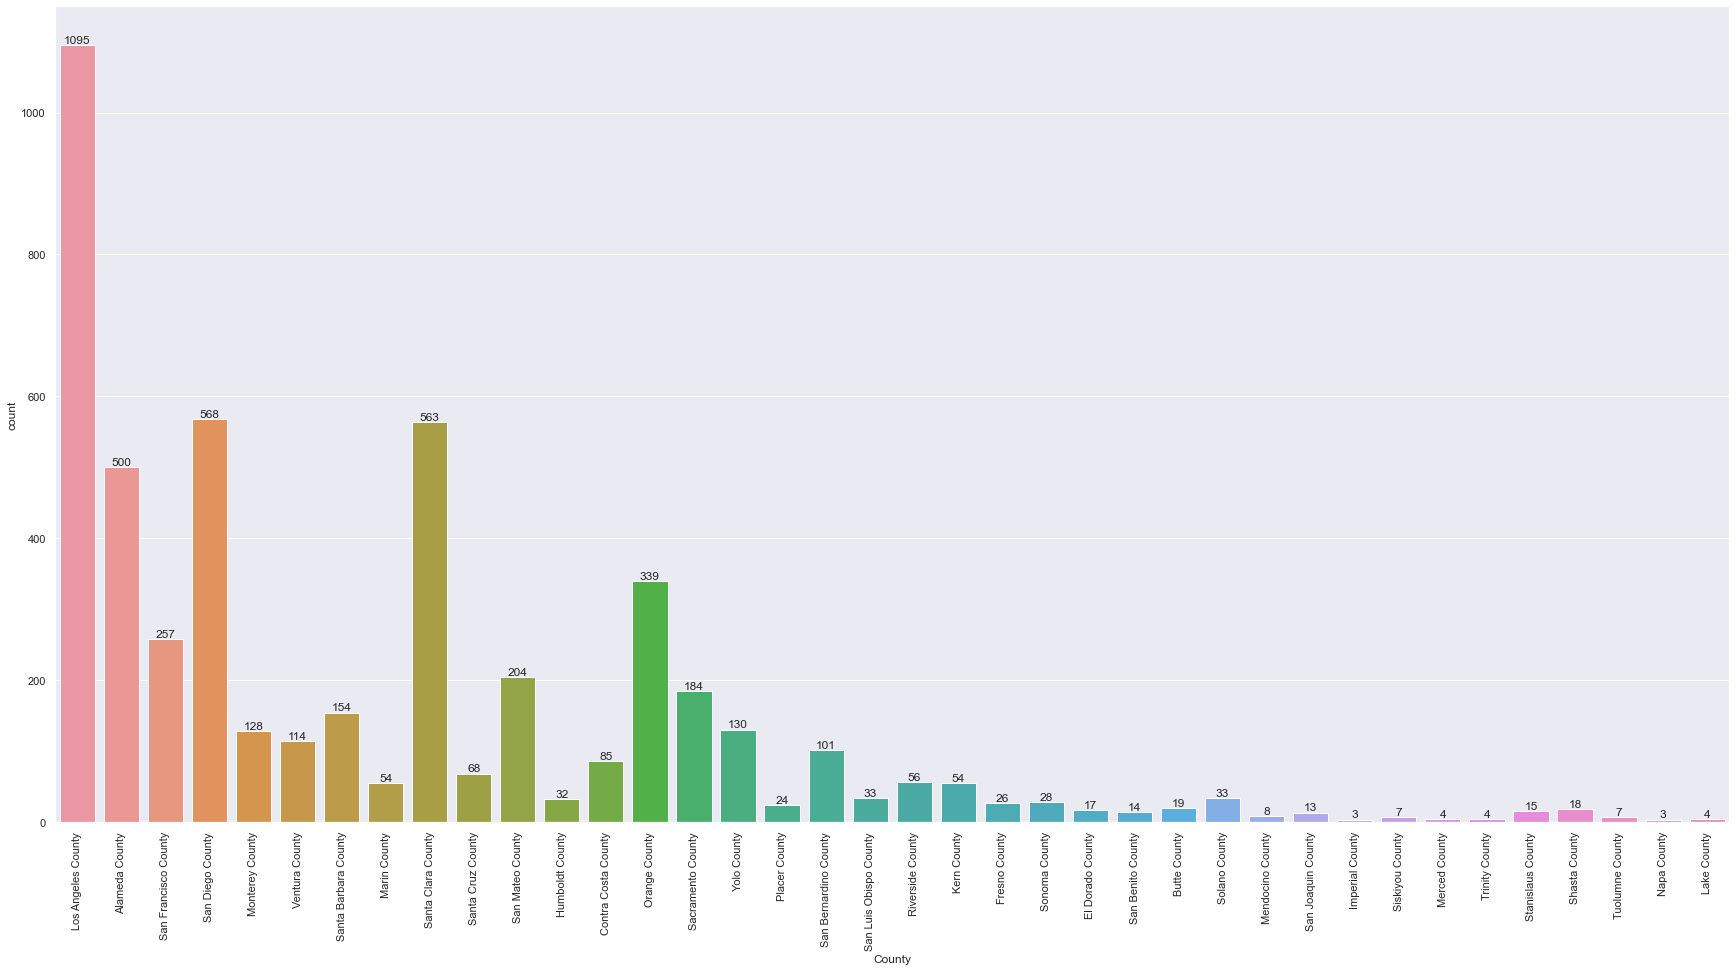

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(30, 15))

ax = sns.countplot(
    data["County"]
)  # creating a countplot and assigning it to variable ax

val_count(
    ax, data["County"]
)  # calling the method val_count and passing ax as the argument to get the value counts
# labelled on the plot

plt.xticks(rotation=90)  # align the labels in the X axis
plt.show()

- Los Angeles County has the highest number of observations of 1095
- Quite a handful of counties with under 50 observations

## Bivariate Analysis

In [47]:
## Function to plot stacked bar chart


def stacked_plot(x):
    # sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Personal_Loan"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Personal_Loan"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(0, 1))
    plt.xticks(rotation=0)
    plt.show()

<IPython.core.display.Javascript object>

### 1. Personal Loan vs Age

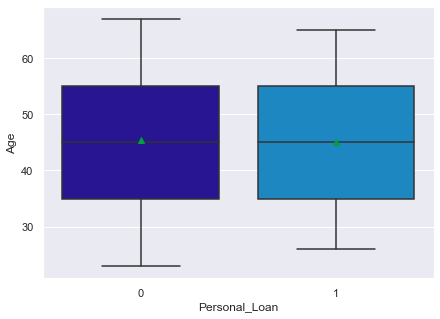

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="Personal_Loan", y="Age", data=data, showmeans=True)
plt.show()

- The IQR of the age of customers who accepted the personal loan and those rejected the personal loan are both same
- Both have the same mean values
- No outliers spotted

### 2. Personal Loan vs Experience

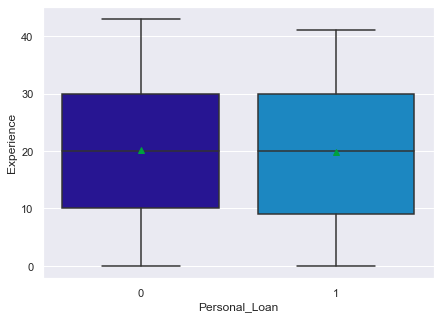

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="Personal_Loan", y="Experience", data=data, showmeans=True)
plt.show()

- The IQR of the experience of customers is almost similar for those accepted and rejected the loan
- The mean is almost the same too 
- No outliers spotted

### 3. Personal Loan vs Income

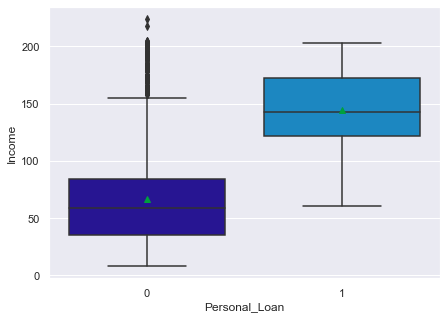

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="Personal_Loan", y="Income", data=data, showmeans=True)
plt.show()

- Customers with higher average annual income seem to have accepted the personal loan
- Outliers spotted above the upper whisker for the ones with NO personal loan
- The minimum average income of customers who accepted the loan is around $60K

### 4. Personal Loan vs Family

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


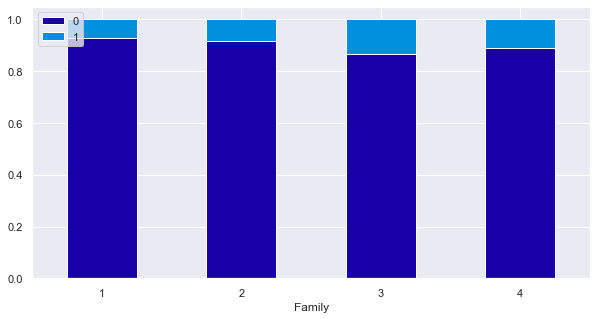

<IPython.core.display.Javascript object>

In [51]:
stacked_plot(data["Family"])

- Family size does not make a significant impact in making the choice of a loan
- However, customers with a family of 3 outnumbers the rest in accepting the loan

### 5. Personal Loan vs Credit Card Average

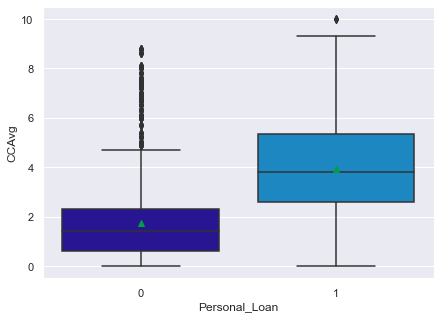

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="Personal_Loan", y="CCAvg", data=data, showmeans=True)
plt.show()

- Customers who spend more on credit card per month on an average, seem to prefer personal loan, comparatively.

### 6. Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


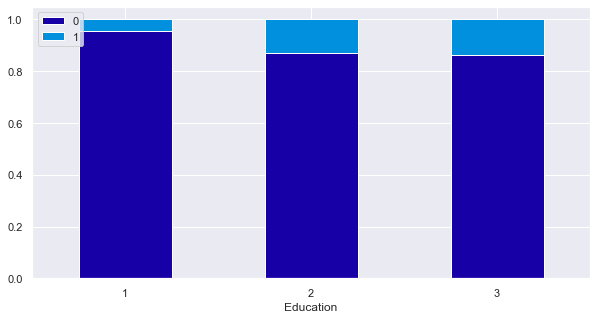

<IPython.core.display.Javascript object>

In [53]:
stacked_plot(data["Education"])

- Customer with Graduate and Advanced/Profession levels of Education have higher preference for personal loan than those customers who are UnderGrads.

### 7. Personal Loan vs Mortgage

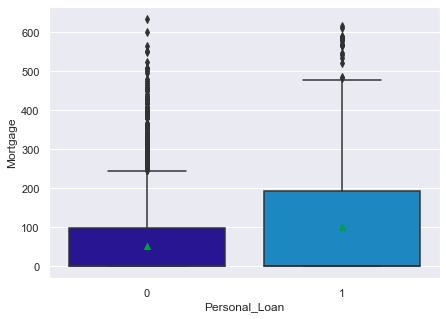

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(7, 5))
sns.boxplot(x="Personal_Loan", y="Mortgage", data=data, showmeans=True)
plt.show()

- It was already seen that Mortgage is skewed towards 0, no significant lower whiskers seen.
- However, cutomers with mortgage seem to have accepted the more personal loan on an average.

### 8. Personal Loan vs Securities Account

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


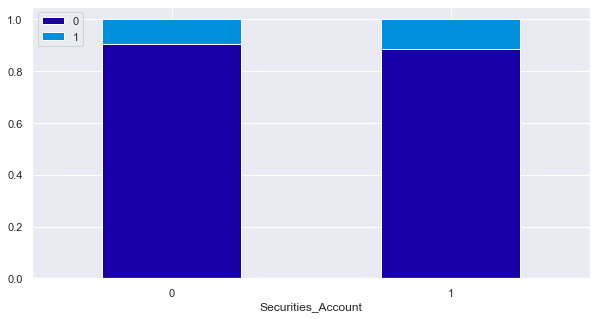

<IPython.core.display.Javascript object>

In [55]:
stacked_plot(data["Securities_Account"])

- Out of 522 customers with Securities Account only 60 of them have accepted the personal loan

### 9. Personal Loan vs CD Account

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


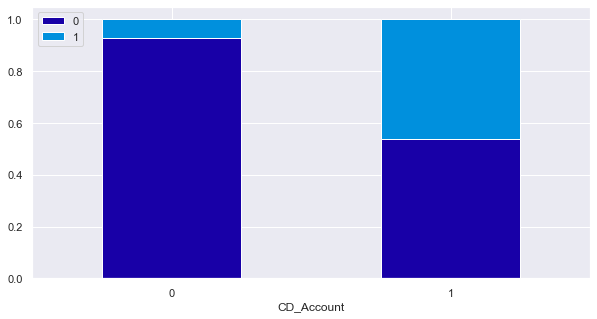

<IPython.core.display.Javascript object>

In [56]:
stacked_plot(data["CD_Account"])

- Out of 302 customers who hold a CD Account, 140 of them have accepted the loan

### 10. Personal Loan vs Online

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


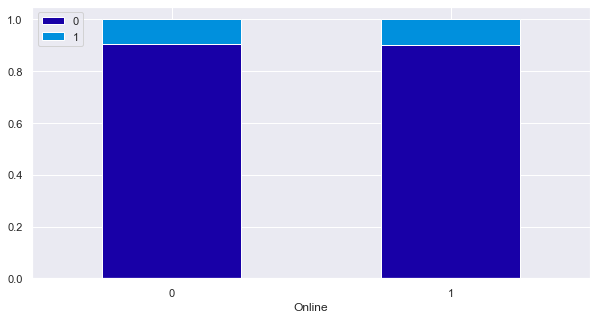

<IPython.core.display.Javascript object>

In [57]:
stacked_plot(data["Online"])

- Out of 2984 customers who avail the internet banking facilities, only 291 of them have accepted the personal loan

### 11. Personal Loan vs Credit Card

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


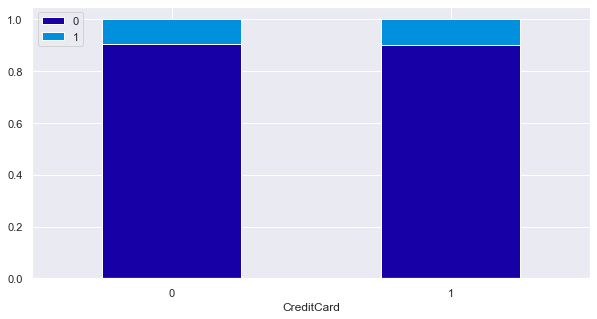

<IPython.core.display.Javascript object>

In [58]:
stacked_plot(data["CreditCard"])

- Out of 1470 customers who use a credit card issued by other bank, 143 of them have a personal loan with All Life Bank.

## 12. Personal Loan vs County

<AxesSubplot:xlabel='County'>

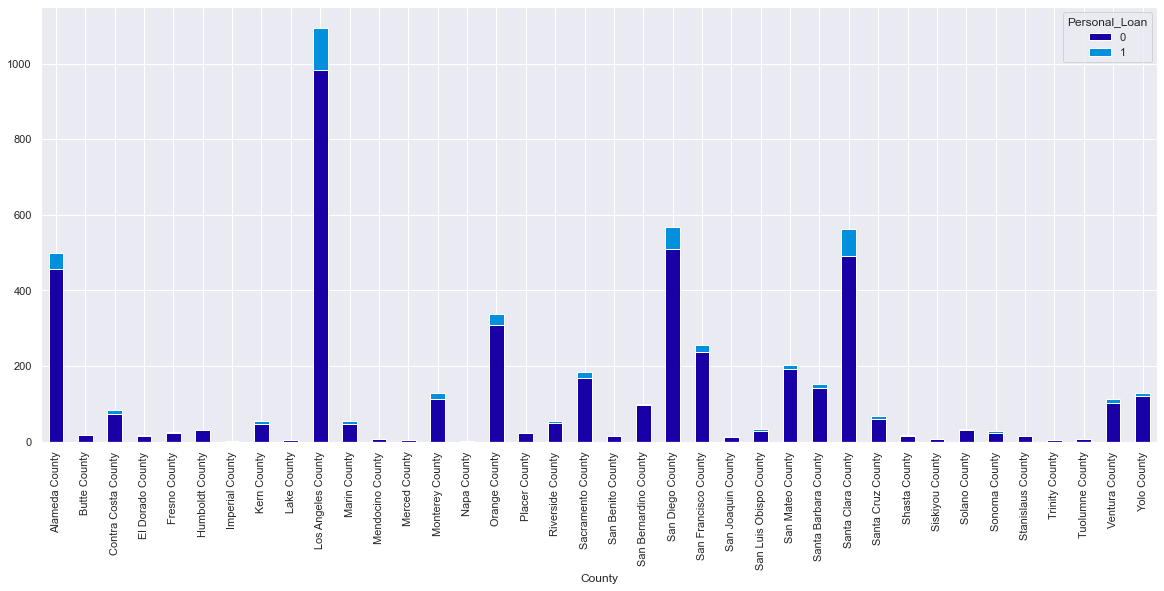

<IPython.core.display.Javascript object>

In [59]:
pd.crosstab(data["County"], data["Personal_Loan"]).plot(
    kind="bar", stacked=True, figsize=(20, 8)
)

- Los Angeles County has the maximum number of customers who borrowed a personal loan of 111
- Followed by Santa Clara at 71 and San Diego county with 59 customers
- Also, Los Angeles county has the maximum number of customers who rejected the personal loan of 984
- Followed by San Diego county with 509 and Santa Clara county with 492 customers
- Persoanl loan values for Imperial County and Napa County need to be checked

## Multivariate Analysis

In [60]:
cols = data[
    [
        "Age",
        "Experience",
        "Income",
        "ZIPCode",
        "Family",
        "CCAvg",
        "Education",
        "Mortgage",
        "Personal_Loan",
        "Securities_Account",
        "CD_Account",
        "Online",
        "CreditCard",
    ]
]

<IPython.core.display.Javascript object>

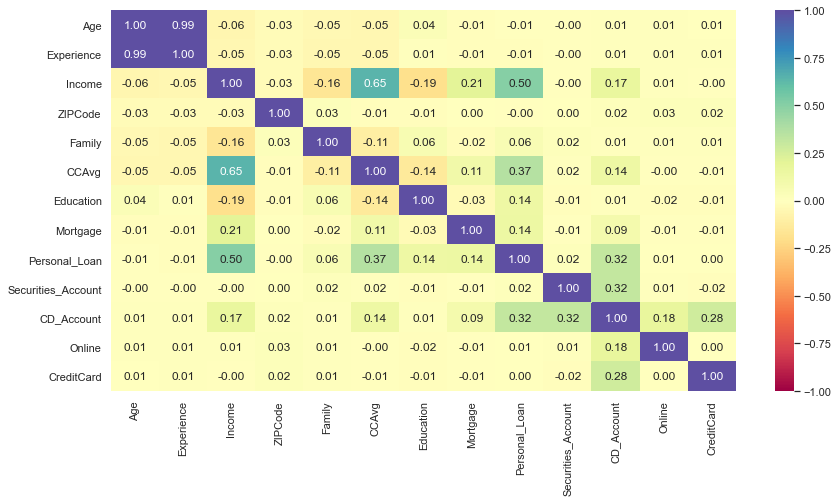

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(14, 7))
sns.heatmap(cols.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="Spectral")
plt.show()

- Age and Experience have a very high correlation of 0.99
- Income and CCAvg have a positive correlation of 0.65
- Personal Loan and Income have a correlation of 0.50
- Personal Loan and CCAvg have a correlation of 0.37

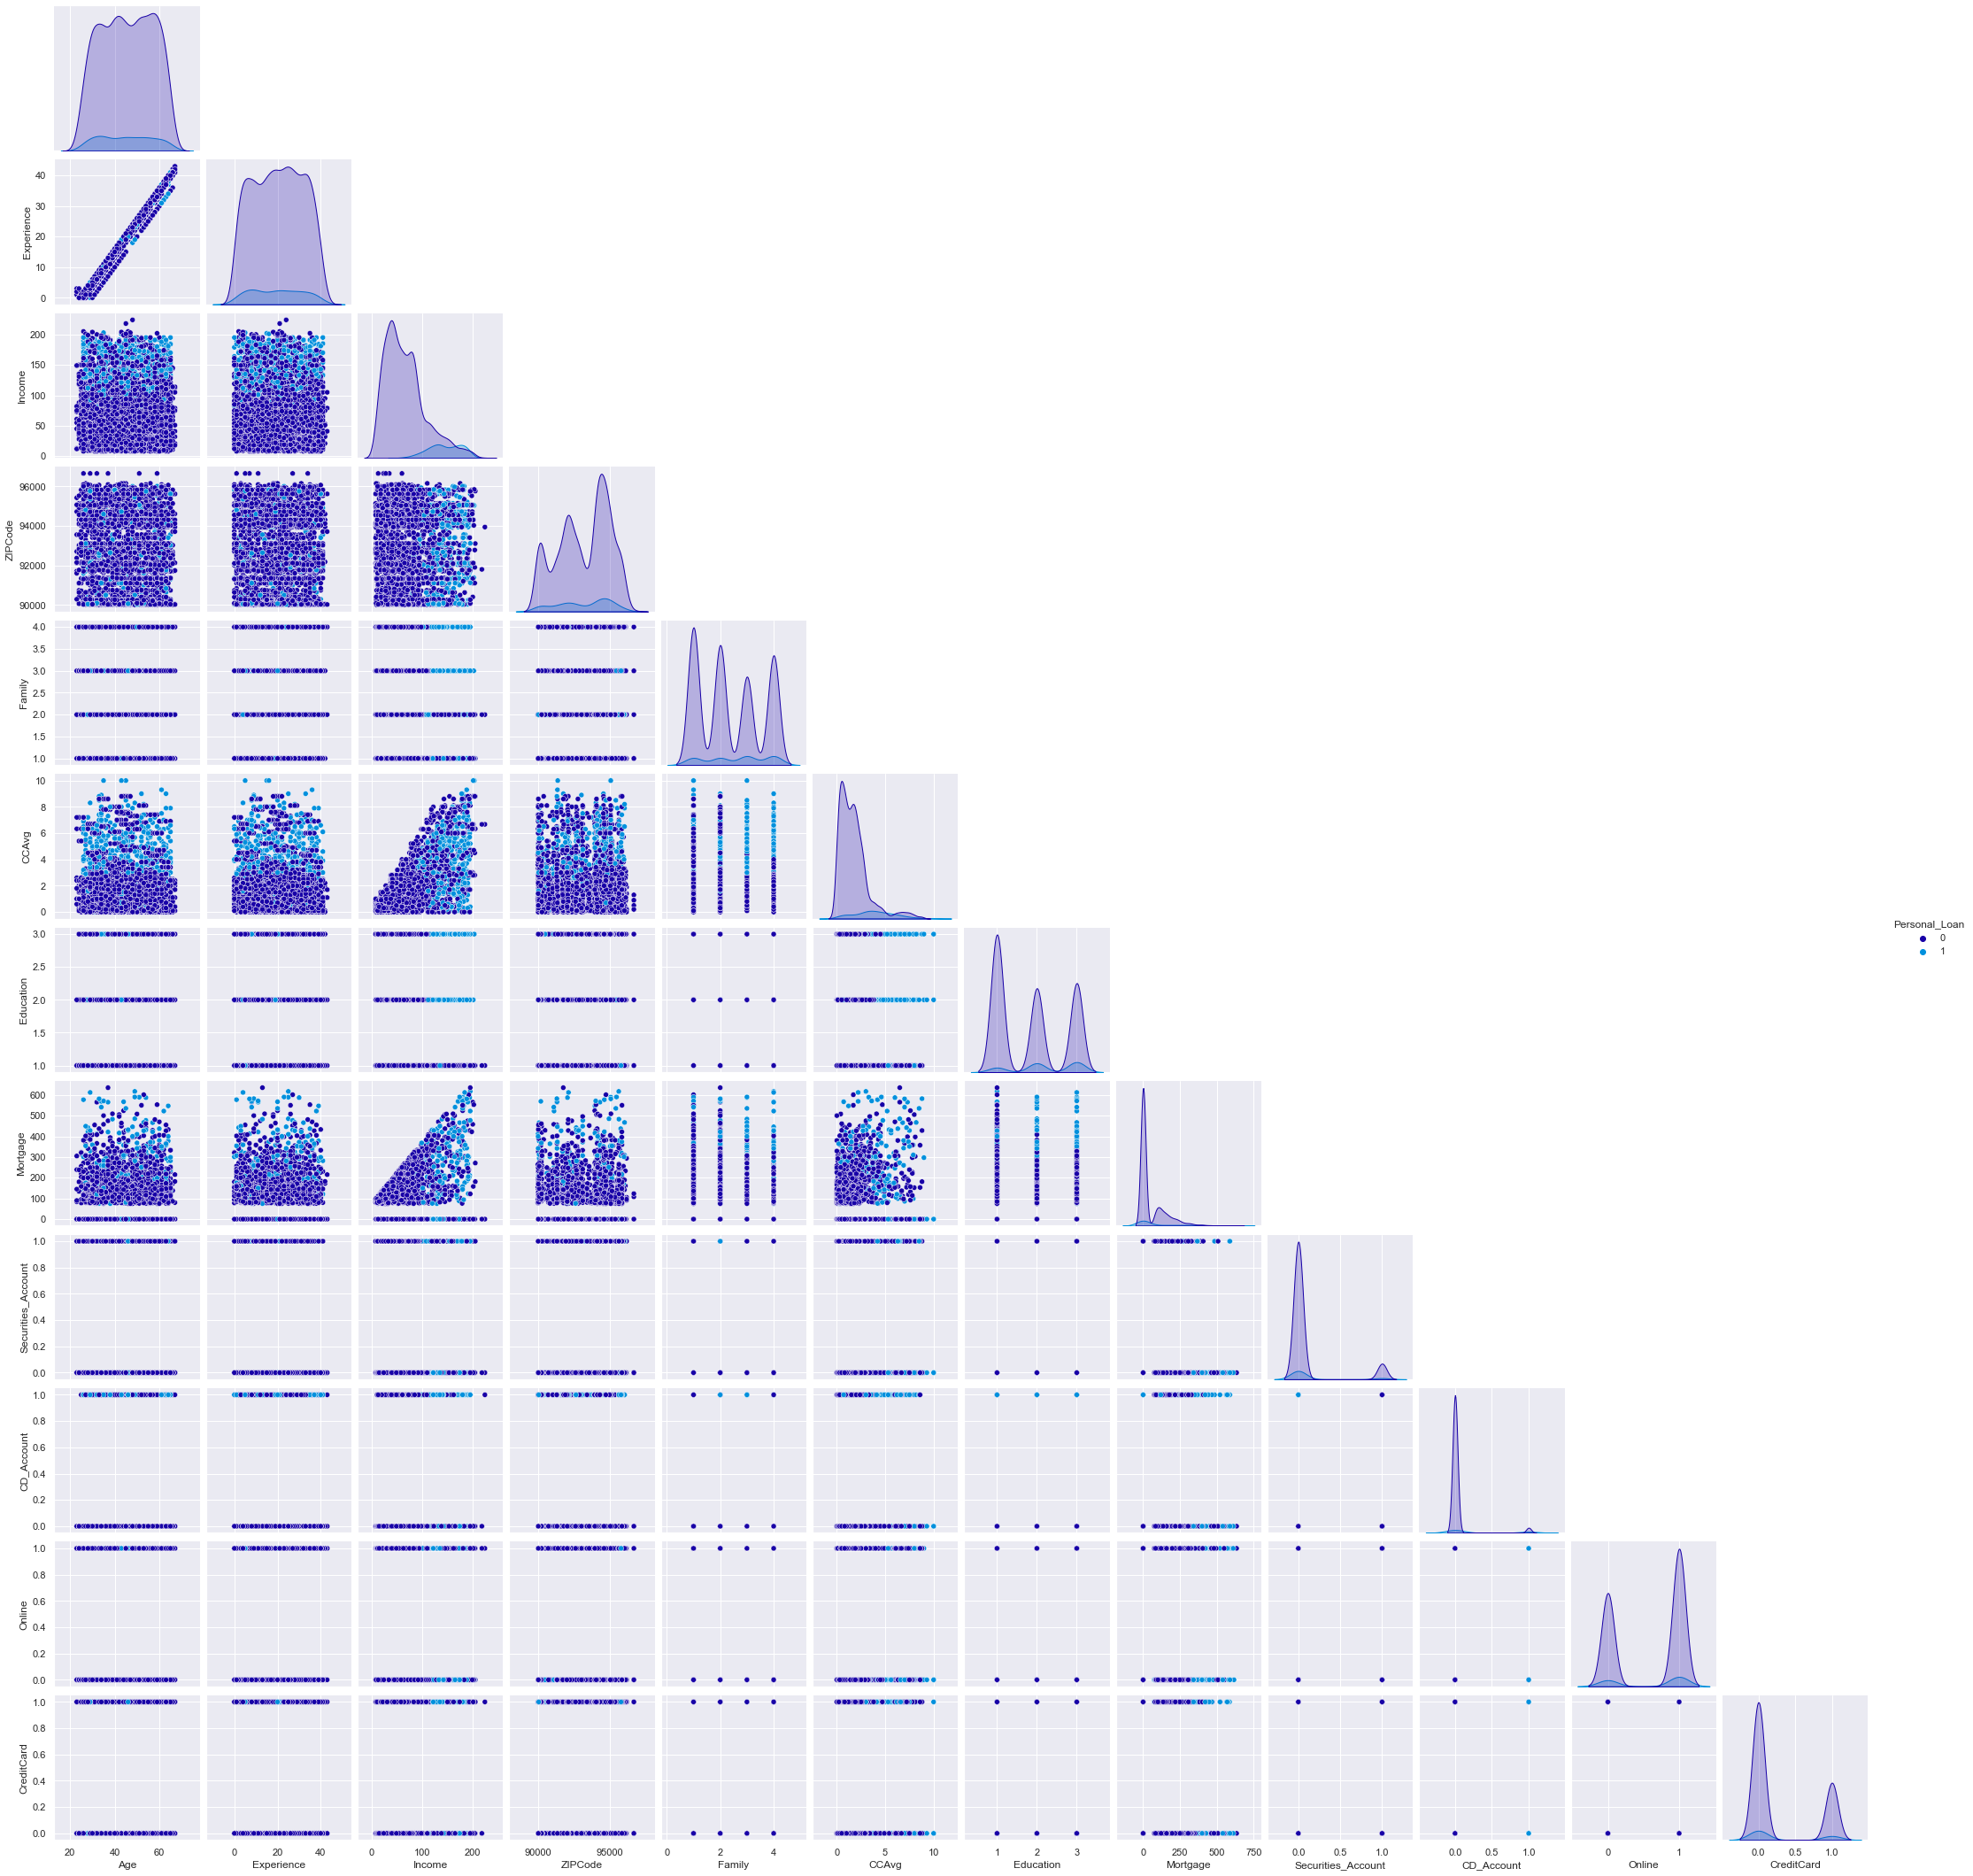

<IPython.core.display.Javascript object>

In [62]:
sns.pairplot(cols, hue="Personal_Loan", corner=True)
plt.show()

- It can be inferred that customers with higher the Income, CCAvg and Mortgage has borrowed a Personal Loan

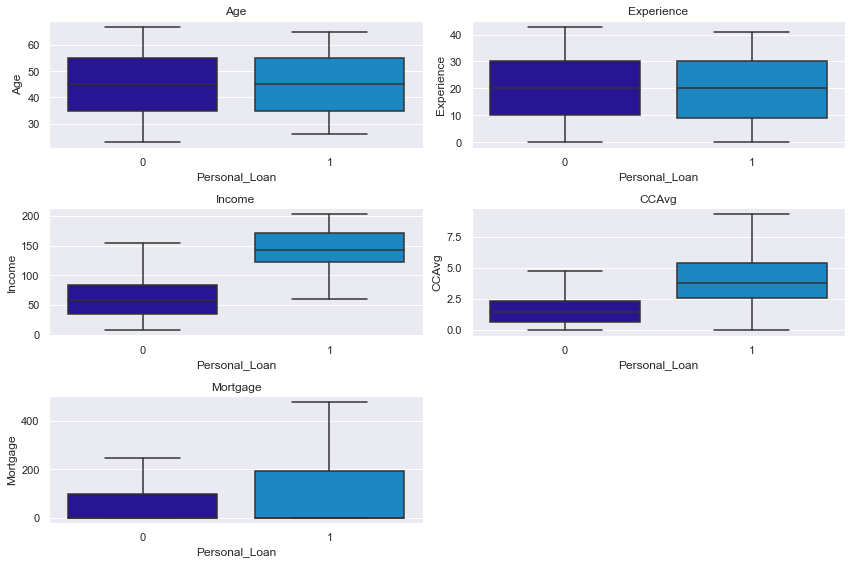

<IPython.core.display.Javascript object>

In [63]:
col1 = data[["Age", "Experience", "Income", "CCAvg", "Mortgage",]].columns.tolist()

plt.figure(figsize=(12, 8))

for i, variable in enumerate(col1):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["Personal_Loan"], data[variable], showfliers=False)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Our observation from the pairplot seems correct
- Customers with higher Income, CCAvg and Mortgage have borrowed Personal Loan
- Age and Experience show similar distribution as expected as have high positive correlation

# Data Preprocessing for Model Building

In [64]:
data["County"].value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou County              7
Tuolumne

<IPython.core.display.Javascript object>

In [65]:
# Grouping counties under 40 observations into 'Other County'

county = data["County"].value_counts().tail(20).keys()
data["County"] = np.where(data["County"].isin(county), "Other County", data["County"])

<IPython.core.display.Javascript object>

In [66]:
data["County"].value_counts()

Los Angeles County       1095
San Diego County          568
Santa Clara County        563
Alameda County            500
Orange County             339
Other County              312
San Francisco County      257
San Mateo County          204
Sacramento County         184
Santa Barbara County      154
Yolo County               130
Monterey County           128
Ventura County            114
San Bernardino County     101
Contra Costa County        85
Santa Cruz County          68
Riverside County           56
Kern County                54
Marin County               54
Name: County, dtype: int64

<IPython.core.display.Javascript object>

In [67]:
data["Mortgage"].value_counts()

0      3462
98       17
89       16
91       16
83       16
       ... 
206       1
210       1
258       1
278       1
635       1
Name: Mortgage, Length: 347, dtype: int64

<IPython.core.display.Javascript object>

In [68]:
data.groupby("Personal_Loan")["Mortgage"].value_counts()

Personal_Loan  Mortgage
0              0           3150
               98            17
               83            16
               89            16
               103           16
                           ... 
1              587            1
               589            1
               590            1
               612            1
               617            1
Name: Mortgage, Length: 446, dtype: int64

<IPython.core.display.Javascript object>

- We have seen that Mortgage is highly skewed towards '0'
- It is also evident that Personal loan is '0' for all Mortgage '0' values
- Hence, Mortgage can be restructed as Yes/No for better analysis

In [69]:
# User defined function to convert Mortgage to a Boolean data


def mort(val):
    if val == 0:
        return "No"
    else:
        return "Yes"


data["Mortgage_Y/N"] = data["Mortgage"].apply(mort)
data["Mortgage_Y/N"].value_counts()

No     3462
Yes    1538
Name: Mortgage_Y/N, dtype: int64

<IPython.core.display.Javascript object>

In [70]:
# Making the copy of the dataset before outlier treatment to build a Decision Tree model as Decision Trees are not affected by outliers

data_dtree = data.copy()

<IPython.core.display.Javascript object>

## Outlier Treatment

In [71]:
# Creating a list of numerical columns

cols1 = data[["Age", "Experience", "Income", "CCAvg", "Mortgage"]]

<IPython.core.display.Javascript object>

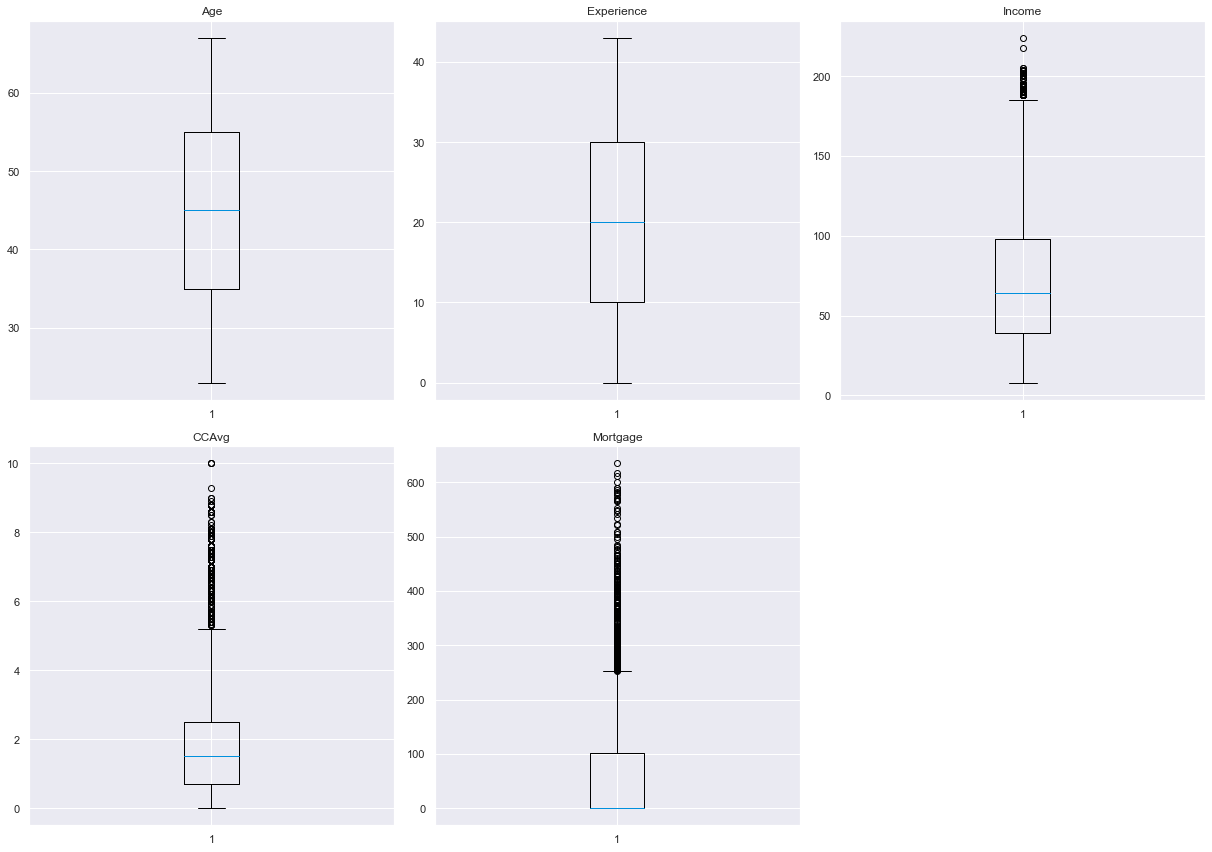

<IPython.core.display.Javascript object>

In [72]:
# Boxplots of numerical columns to view the outliers

plt.figure(figsize=(17, 12))

for i, variable in enumerate(cols1):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [73]:
# User defined function to floor and cap the outliers


def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """

    Q1 = df[col].quantile(0.25)  # 1st quantile
    Q3 = df[col].quantile(0.75)  # 3rd quantile
    IQR = Q3 - Q1
    Lower_whisker = Q1 - 1.5 * IQR
    Upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker

    df[col] = np.clip(df[col], Lower_whisker, Upper_whisker)

    return df


def treat_outliers_all(df, col_list):

    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """

    for c in col_list:
        df = treat_outliers(df, c)
    return df

<IPython.core.display.Javascript object>

In [74]:
# Treating the outliers

data = treat_outliers_all(
    data, col1
)  # apply the user defined function to fix the outliers

<IPython.core.display.Javascript object>

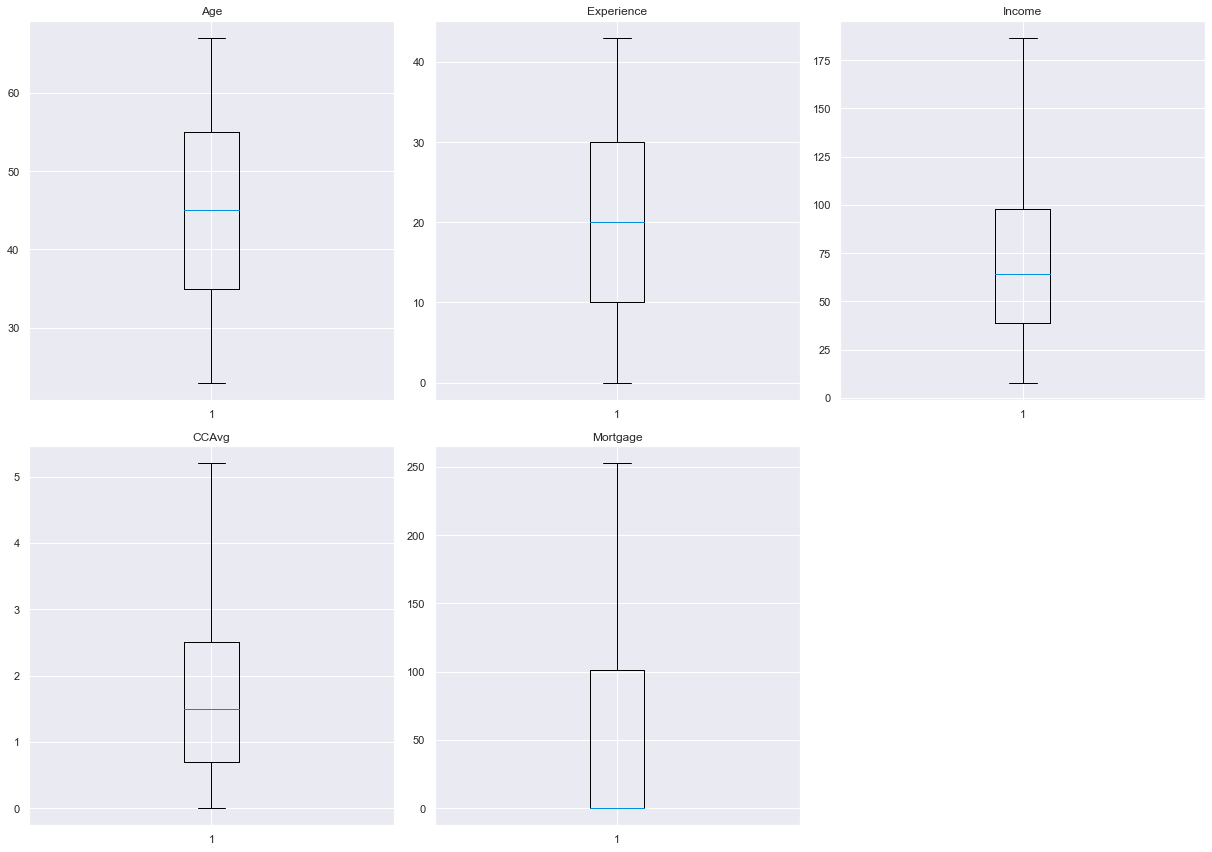

<IPython.core.display.Javascript object>

In [75]:
# Plotting the boxplot to chk if the outliers are fixed

plt.figure(figsize=(17, 12))

for i, variable in enumerate(col1):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers have been fixed now

In [76]:
# Categorizing datatypes

data["County"] = data["County"].astype("category")
data["Mortgage_Y/N"] = data["Mortgage_Y/N"].astype("category")
data["Education"] = data["Education"].astype("category")

<IPython.core.display.Javascript object>

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   float64 
 3   ZIPCode             5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   float64 
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
 13  County              4966 non-null   category
 14  Mortgage_Y/N        5000 non-null   category
dtypes: category(3), float64(3), int64(9)
m

<IPython.core.display.Javascript object>

- Now the data preprocessing has been done
- Need to drop the unwanted columns before proceeding with model building

In [78]:
# Dropping unwanted columns

data.drop(["ZIPCode", "Mortgage"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [79]:
# Viewing the final dataset

data.head()

,Age,Experience,Income,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Mortgage_Y/N
ID,,,,,,,,,,,,,
1,25,1,49.0,4,1.6,1,0,1,0,0,0,Los Angeles County,No
2,45,19,34.0,3,1.5,1,0,1,0,0,0,Los Angeles County,No
3,39,15,11.0,1,1.0,1,0,0,0,0,0,Alameda County,No
4,35,9,100.0,1,2.7,2,0,0,0,0,0,San Francisco County,No
5,35,8,45.0,4,1.0,2,0,0,0,0,1,Los Angeles County,No


<IPython.core.display.Javascript object>

In [80]:
# Making a copy of the data for Logistic Regression model building

data_logit = data.copy()

<IPython.core.display.Javascript object>

# Key Insights from EDA

Maximum number of customers who opted for a personal loan in the previous campaign are:
- Between the ages of 35 and 55
- Have a minimum annual average income above 120K dollars
- Have a minimum experience of nine years
- Have a family size of three and above
- Own a CD Account with the bank
- Have an education level of two and above
- Spend an average of $2.5K on credit cards every month
- Have a mortgage
- Avail online banking facilities
- From the Los Angeles, San Diego, or Santa Clara counties

# Model Building - Logistic Regression

### Creating training and test sets

In [81]:
X = data_logit.drop("Personal_Loan", axis=1)
y = data_logit["Personal_Loan"]

# Creating dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [82]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Testing set : ", X_test.shape)
print("\n Percentage of classes in training set : ")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in test set : ")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 30)
Shape of Testing set :  (1500, 30)

 Percentage of classes in training set : 
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

 Percentage of classes in test set : 
0    0.904
1    0.096
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

- We have a well balanced classes of the dependent variable in both train and test sets

### Model evaluation criterion

#### Model can make wrong prediction as :

1. Predicting a customer will borrow the personal loan but in reality the customer does not borrow.
2. Predicting a customer will not borrow the personal loan but in reality the customer will borrow the laon.

#### Prediction of concern :

- The second prediction is our major concern as the AllLife Bank is looking to expand it's loan business, every single customer who will borrow the personal loan is very important. Hence, mistakes in the second prediction (i.e. False Negatives) has to be considerably low 

#### How to reduce False Negatives :

- ***Recall*** score should be maximized. Greater the Recall score higher the chances of predicting the potential customers who will borrow  a personal loan

### User defined functions to calculate the different metrics and the confusion matrix

In [83]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels


def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [84]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Logistic Regression with Sklearn library

In [85]:
# Using the newton-cg solver as it is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Model performance on training set

In [86]:
# predicting on training set

y_pred_train = lg.predict(X_train)

<IPython.core.display.Javascript object>

In [87]:
print("Training set performance : \n")
print("Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Recall : ", recall_score(y_train, y_pred_train))
print("Precision : ", precision_score(y_train, y_pred_train))
print("F1 : ", f1_score(y_train, y_pred_train))

Training set performance : 

Accuracy :  0.966
Recall :  0.7113095238095238
Precision :  0.9157088122605364
F1 :  0.8006700167504187


<IPython.core.display.Javascript object>

#### Model performance on test set

In [88]:
# predicting on the test set

y_pred_test = lg.predict(X_test)

<IPython.core.display.Javascript object>

In [89]:
print("Test set performance : \n")
print("Accuracy : ", accuracy_score(y_test, y_pred_test))
print("Recall : ", recall_score(y_test, y_pred_test))
print("Precision : ", precision_score(y_test, y_pred_test))
print("F1 : ", f1_score(y_test, y_pred_test))

Test set performance : 

Accuracy :  0.9553333333333334
Recall :  0.625
Precision :  0.8737864077669902
F1 :  0.728744939271255


<IPython.core.display.Javascript object>

**Observations**

- The training and testing Recall scores are 0.71 and 0.63 respectively
- The metric scores seem to be good
- However, to check the statistical validity of the model we must build a model using the statsmodels library

## Logistic Regression with statsmodels library

In [90]:
X = data_logit.drop("Personal_Loan", axis=1)
y = data_logit["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [91]:
# Fitting logistic regression model

logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3469
Method:                           MLE   Df Model:                           30
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                  0.6706
Time:                        18:10:06   Log-Likelihood:                -360.88
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.478e-290
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -15.5639      2.287     -6.804      0.000     -20.047     -11.081
Age                              0.0139      0.081      0.171      0.864     

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficients indicate that the probabiltiy of the customer borrowing a personal loan decreases with the increase of corresponding attribute value.
- Positive values of the coefficient indicate that the probability of the customer borrowing a personal loan increases with the increase of corresponding attribute value.
- p-value of a variable indicates if that variable is significant or not. If we consider the significance level to be 0.05, then any variable with a p-value less than 0.05 would be considered significant.
- Multicollinearity among these variables will affect the p-values. Hence, we will have to remove multicollinearity from the data to get reliable coefficients and p-values.

### Test for Multicollinearity - Variation Inflation Factor (VIF)

In [92]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)

print("Series before feature selection : \n\n{}\n".format(vif_series))

Series before feature selection : 

const                           458.859890
Age                              91.830847
Experience                       91.766500
Income                            1.814619
Family                            1.051208
CCAvg                             1.712590
Securities_Account                1.149595
CD_Account                        1.359131
Online                            1.050020
CreditCard                        1.116105
Education_2                       1.298271
Education_3                       1.338024
County_Contra Costa County        1.130431
County_Kern County                1.087930
County_Los Angeles County         2.321323
County_Marin County               1.085936
County_Monterey County            1.202012
County_Orange County              1.519173
County_Other County               1.450622
County_Riverside County           1.081905
County_Sacramento County          1.303322
County_San Bernardino County      1.168559
County_San Diego C

<IPython.core.display.Javascript object>

**Observations**

- Both Age and Experience have a VIF score above 5, indicating that these variables are collinear.

### Removing Multicollinearity 

#### Removing Age

In [93]:
X_train1 = X_train.drop("Age", axis=1)

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)

print("Series before feature selection : \n\n{}".format(vif_series1))

Series before feature selection : 

const                           26.396521
Experience                       1.016307
Income                           1.809311
Family                           1.050873
CCAvg                            1.707389
Securities_Account               1.149375
CD_Account                       1.358673
Online                           1.049946
CreditCard                       1.116063
Education_2                      1.285068
Education_3                      1.261519
County_Contra Costa County       1.130366
County_Kern County               1.087856
County_Los Angeles County        2.320987
County_Marin County              1.085156
County_Monterey County           1.201999
County_Orange County             1.516717
County_Other County              1.450095
County_Riverside County          1.081848
County_Sacramento County         1.303075
County_San Bernardino County     1.168491
County_San Diego County          1.759272
County_San Francisco County      1.40546

<IPython.core.display.Javascript object>

- Now all the variables have a VIF<5. Hence, we can proceed with model building

In [94]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3470
Method:                           MLE   Df Model:                           29
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                  0.6706
Time:                        18:10:19   Log-Likelihood:                -360.90
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.088e-291
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -15.2074      0.933    -16.302      0.000     -17.036     -13.379
Experience                       0.0082      0.009      0.938      0.348     

<IPython.core.display.Javascript object>

### Removing variables with p-value > 0.05

#### Removing Experience

In [95]:
X_train2 = X_train1.drop("Experience", axis=1)

logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.103240
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3471
Method:                           MLE   Df Model:                           28
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                  0.6701
Time:                        18:10:23   Log-Likelihood:                -361.34
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                4.400e-292
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -15.0024      0.901    -16.658      0.00

<IPython.core.display.Javascript object>

In [96]:
# Running a loop to drop dummies with high p-value

# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'Income', 'Family', 'CCAvg', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_2', 'Education_3', 'County_Riverside County', 'County_San Mateo County']


<IPython.core.display.Javascript object>

In [97]:
X_train3 = X_train2[selected_features]

logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.104646
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Thu, 29 Jul 2021   Pseudo R-squ.:                  0.6657
Time:                        18:10:27   Log-Likelihood:                -366.26
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                3.012e-306
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -14.5459      0.799    -18.215      0.000     -16.111  

<IPython.core.display.Javascript object>

**Observations**

- No feature now have a p-value greater than 0.05. Therefore, the features in X_train3 can be considered as the final ones and lg3 as the final model.
- The coefficients of all the selected features are positive. Hence, an increase in these will lead to an increase in the probability of a customer accepting the personal loan.

### Converting coefficients to odds

In [98]:
# converting coefficients to odds as they are in terms of log(odd)
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,Income,Family,CCAvg,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,County_Riverside County,County_San Mateo County
Odds,4.817296e-07,1.065667,2.065165,1.571607,0.333060,51.116532,0.479100,0.310842,62.205442,68.507955,6.677706,0.217172
Change_odd%,-9.999995e+01,6.566662,106.516536,57.160652,-66.693994,5011.653188,-52.089962,-68.915804,6120.544211,6750.795502,567.770599,-78.282760


<IPython.core.display.Javascript object>

### Coefficient interpretations

- Holding all other features a constant, a change in either one of the features `Income, Family, CCAvg, CD_Account, Education levels, Riverside County` will increase the odds of a customer taking a personal loan
- Likewise, holding all other features a constant, a change in either one of the features `Securities_Account, Online, CreditCard, San Mateo County` will decrease the odds of a customer taking a personal loan.

#### Model performance on training set 

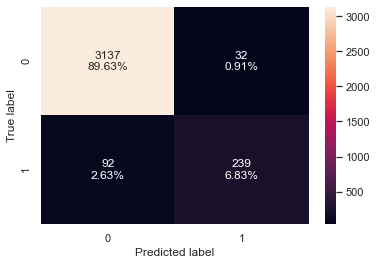

<IPython.core.display.Javascript object>

In [99]:
# creating confusion matrix

confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [100]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance :")
log_reg_model_train_perf

Training performance :


,Accuracy,Recall,Precision,F1
0,0.964571,0.722054,0.881919,0.79402


<IPython.core.display.Javascript object>

#### Model performance on test set

- Dropping the columns from the test set that were dropped from the training set

In [101]:
X_test3 = X_test[list(X_train3.columns)]

<IPython.core.display.Javascript object>

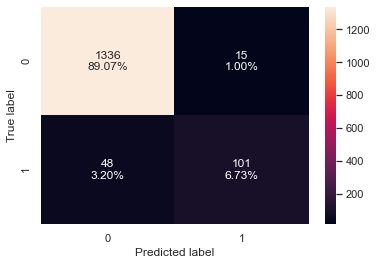

<IPython.core.display.Javascript object>

In [102]:
# creating confusion matrix

confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [103]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance :")
log_reg_model_test_perf

Test performance :


,Accuracy,Recall,Precision,F1
0,0.958,0.677852,0.87069,0.762264


<IPython.core.display.Javascript object>

#### AUC - ROC on training set

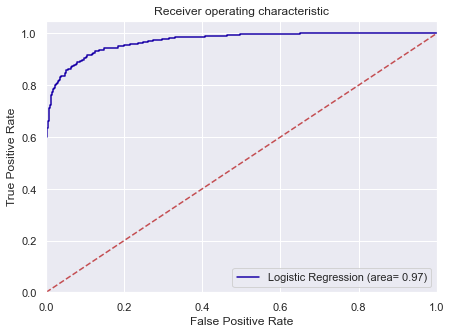

<IPython.core.display.Javascript object>

In [104]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area= %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Model performance improvement by determining the Optimal threshold using the AUC - ROC curve

In [105]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.07949786138091508


<IPython.core.display.Javascript object>

#### Model performance on training set

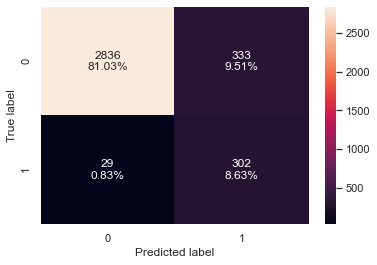

<IPython.core.display.Javascript object>

In [106]:
# creating confusion matrix

confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [107]:
# checking model performance for this model

log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

print("Training performance")
log_reg_model_train_perf_threshold_auc_roc

Training performance


,Accuracy,Recall,Precision,F1
0,0.896571,0.912387,0.475591,0.625259


<IPython.core.display.Javascript object>

**Observations**

- Recall of model has increased but the other metrics have reduced
- The model is still giving a good performance

#### Model performance on test set

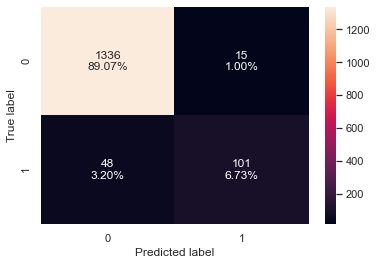

<IPython.core.display.Javascript object>

In [108]:
# creating confusion matrix

confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [109]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)

print("Test performance :")
log_reg_model_test_perf_threshold_auc_roc

Test performance :


,Accuracy,Recall,Precision,F1
0,0.902,0.892617,0.503788,0.644068


<IPython.core.display.Javascript object>

### Using Precision-Recall curve to find a better threshold

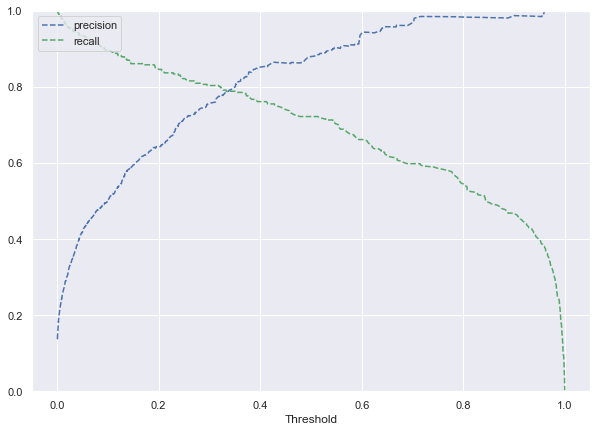

<IPython.core.display.Javascript object>

In [110]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At treshold 0.33 we get a balanced Recall and Precision

In [111]:
# setting the threshold

optimal_threshold_curve = 0.33

<IPython.core.display.Javascript object>

#### Model performance on training set

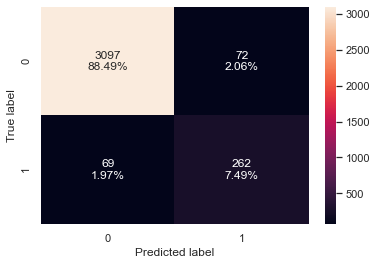

<IPython.core.display.Javascript object>

In [112]:
# creating confusion matrix

confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [113]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)

print("Training performance")
log_reg_model_train_perf_threshold_curve

Training performance


,Accuracy,Recall,Precision,F1
0,0.959714,0.791541,0.784431,0.78797


<IPython.core.display.Javascript object>

#### Model performance on test set

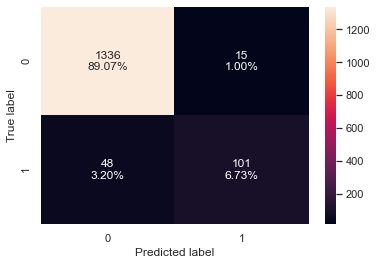

<IPython.core.display.Javascript object>

In [114]:
# creating the confusion matrix

confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [115]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)

print("Test performance : ")
log_reg_model_test_perf_threshold_curve

Test performance : 


,Accuracy,Recall,Precision,F1
0,0.953333,0.738255,0.780142,0.758621


<IPython.core.display.Javascript object>

## Logistic Regression Model Performance Summary

In [116]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Logistic Regression Sklearn",
    "Logistic Regression-0.079 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Training performance comparision : ")
models_train_comp_df

Training performance comparision : 


,Logistic Regression Sklearn,Logistic Regression-0.079 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.964571,0.896571,0.959714
Recall,0.722054,0.912387,0.791541
Precision,0.881919,0.475591,0.784431
F1,0.794020,0.625259,0.787970


<IPython.core.display.Javascript object>

In [117]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Logistic Regression Sklearn",
    "Logistic Regression-0.079 Threshold",
    "Logistic Regression-0.33 Threshold",
]

print("Test performance comparison : ")
models_test_comp_df

Test performance comparison : 


,Logistic Regression Sklearn,Logistic Regression-0.079 Threshold,Logistic Regression-0.33 Threshold
Accuracy,0.958000,0.902000,0.953333
Recall,0.677852,0.892617,0.738255
Precision,0.870690,0.503788,0.780142
F1,0.762264,0.644068,0.758621


<IPython.core.display.Javascript object>

## Conclusion

- Logistic Regression model with a threshold of 0.079 gives the highest Recall of 0.91 in the train set
- Likewise, the same model gives the highest Recall value of 0.89 in the test set
- The values are comparable across all three Logistic Regression models

# Model Building - Decision Tree

In [118]:
# Viewing the dataset data_dtree that was created prior to the outlier treatment

data_dtree.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,Mortgage_Y/N
ID,,,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County,No
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County,No
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County,No
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County,No
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County,No


<IPython.core.display.Javascript object>

### Creating training and test sets

In [119]:
X = data_dtree.drop(["Personal_Loan", "ZIPCode", "Mortgage"], axis=1)
y = data_dtree["Personal_Loan"]

# Creating dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [120]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("\n Percentage of classes in training set : ")
print(y_train.value_counts(normalize=True))
print("\n Percentage of classes in test set : ")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 29)
Shape of test set :  (1500, 29)

 Percentage of classes in training set : 
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

 Percentage of classes in test set : 
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

- We have a well balanced classes of the dependent variable in both train and test sets

### Model evaluation criterion

#### Model can make wrong prediction as :

1. Predicting a customer will borrow the personal loan but in reality the customer does not borrow.
2. Predicting a customer will not borrow the personal loan but in reality the customer will borrow the laon.

#### Prediction of concern :

- The second prediction is our major concern as the AllLife Bank is looking to expand it's loan business, every single customer who will borrow the personal loan is very important. Hence, mistakes in the second prediction (i.e. False Negatives) has to be considerably low 

#### How to reduce False Negatives :

- ***Recall*** score should be maximized. Greater the Recall score higher the chances of predicting the potential customers who will borrow  a personal loan

### User defined functions to calculate the different metrics and the confusion matrix

In [121]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [122]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [123]:
# Building a Decision Tree using default 'gini' criteria to split

model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)  # defining higher weightage to 1 in the dependent variable

<IPython.core.display.Javascript object>

In [124]:
# Fitting the model on the training set

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Model performance on training set

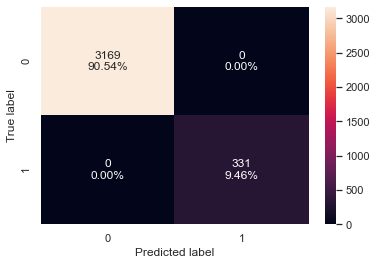

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(model, X_train, y_train)

In [126]:
decision_tree_perf_train = model_performance_classification(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

**Observations**

- The decision tree is fully grown i.e hence the model is overfit and it is able to classify all the data points on the training set with no errors

#### Model performance on test set

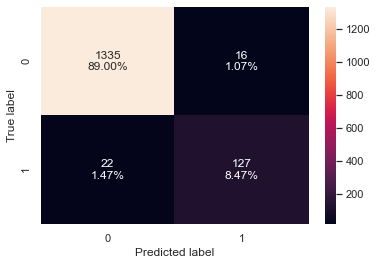

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn(model, X_test, y_test)

In [128]:
decision_tree_perf_test = model_performance_classification(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.974667,0.852349,0.888112,0.869863


<IPython.core.display.Javascript object>

- The disparity in model performance is due to overfitting

### Visualizing the Decision Tree

In [129]:
# Creating a list of column names

feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

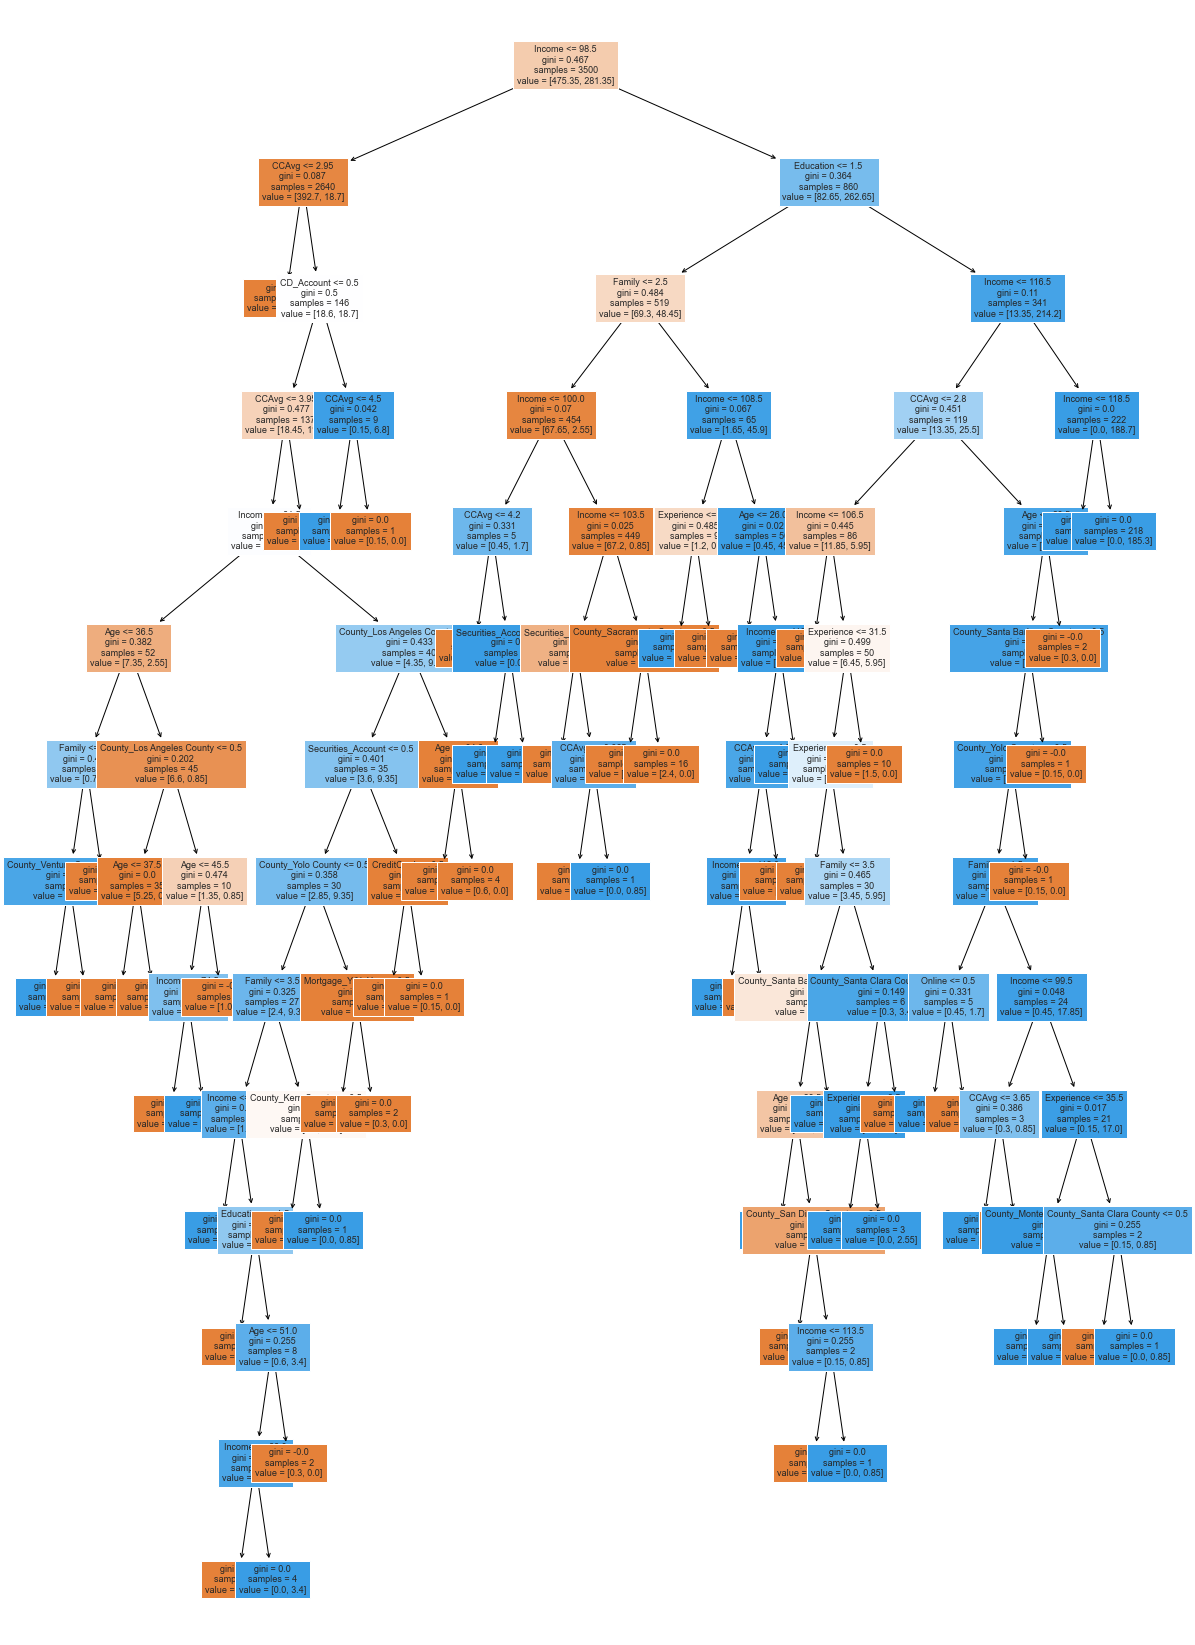

<IPython.core.display.Javascript object>

In [130]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [131]:
# Text report showing the rules of a decision tree

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- County_Ventura County <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |   |--- County_Ventura County >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- County_Los Angeles County <= 0.50
|   |   |   |   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  37.50
|   |   |   |   |   |   |   |   |--- weights: [5.10, 0.00] class: 0
|   | 

<IPython.core.display.Javascript object>

- The tree above is fully grown hence, complex and difficult to interpret

In [132]:
# Gini importance of features in the tree building

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
Income                        5.938610e-01
Family                        1.448967e-01
Education                     1.262677e-01
CCAvg                         8.063655e-02
Age                           1.130878e-02
CD_Account                    1.099955e-02
Experience                    8.090563e-03
Securities_Account            5.117337e-03
County_Los Angeles County     3.400444e-03
County_San Diego County       3.065931e-03
County_Santa Barbara County   2.485045e-03
County_Kern County            2.473356e-03
County_Yolo County            2.322744e-03
County_Santa Clara County     2.281170e-03
Online                        2.013197e-03
County_Ventura County         7.798872e-04
County_Sacramento County      2.447958e-16
County_Monterey County        2.028972e-17
CreditCard                    1.248477e-17
Mortgage_Y/N_Yes              7.490864e-18
County_Riverside County       0.000000e+00
County_San Bernardino County  0.000000e+00
County_Othe

<IPython.core.display.Javascript object>

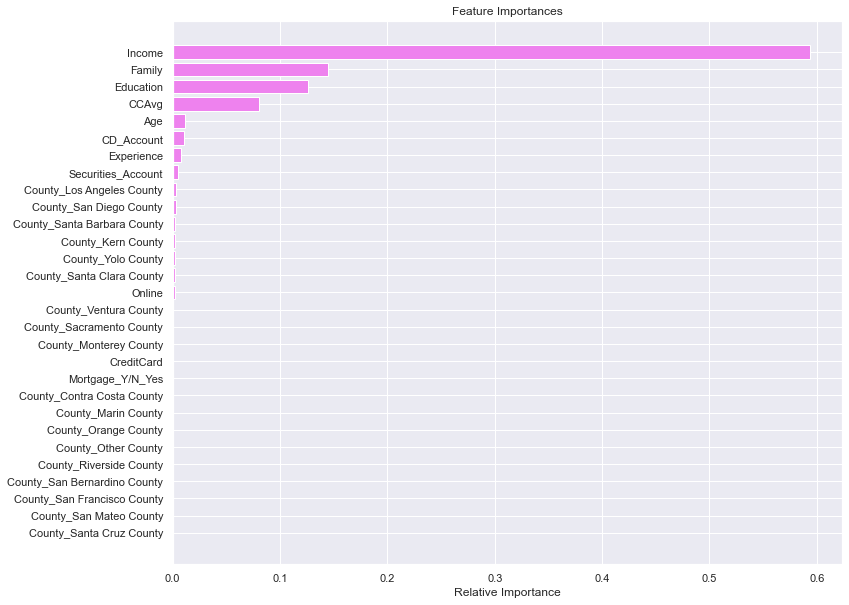

<IPython.core.display.Javascript object>

In [133]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- According to the decision tree model, Income is the most important variable for predicting if a customer will take a Personal Loan

## Model performance improvement

## GridSearch for Hyperparameter tuning to reduce overfitting

In [134]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 0: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

#### Model performance on training set

In [135]:
decision_tree_tune_perf_train = model_performance_classification(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.992,0.963746,0.952239,0.957958


<IPython.core.display.Javascript object>

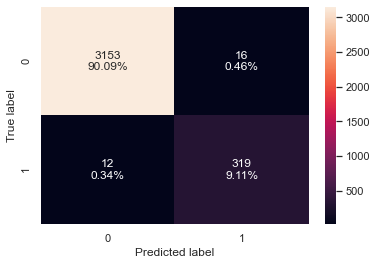

<IPython.core.display.Javascript object>

In [136]:
confusion_matrix_sklearn(estimator, X_train, y_train)

#### Model performance on test set

In [137]:
decision_tree_tune_perf_test = model_performance_classification(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.979333,0.885906,0.90411,0.894915


<IPython.core.display.Javascript object>

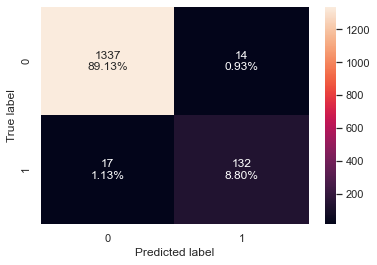

<IPython.core.display.Javascript object>

In [138]:
confusion_matrix_sklearn(estimator, X_test, y_test)

### Visualizing the Decision Tree

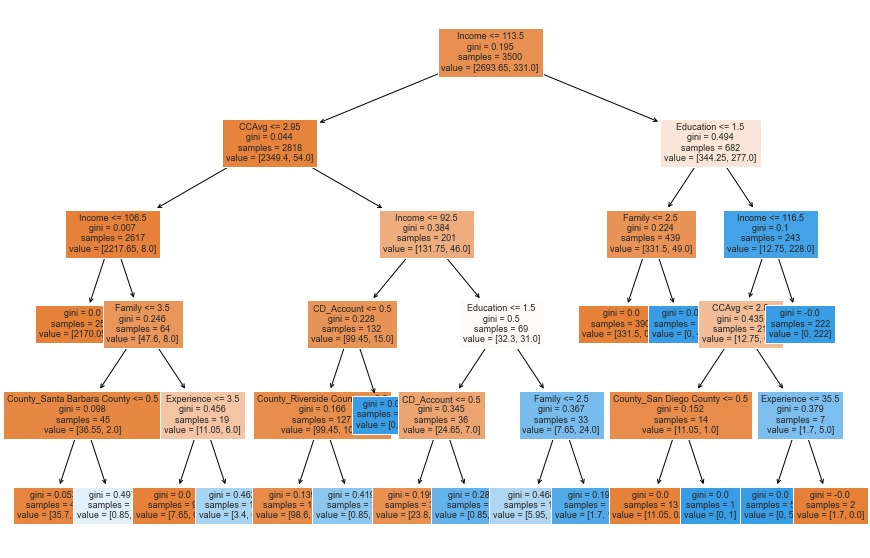

<IPython.core.display.Javascript object>

In [139]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [140]:
# Test report showing the rules of a decision tree

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2170.05, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- County_Santa Barbara County <= 0.50
|   |   |   |   |   |--- weights: [35.70, 1.00] class: 0
|   |   |   |   |--- County_Santa Barbara County >  0.50
|   |   |   |   |   |--- weights: [0.85, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [7.65, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- weights: [3.40, 6.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- County_Riverside County <= 0.50
|   |   |   |   |   |--- weights: [98.60, 8.00] class: 0
|   |   |   |   |--- County_Riverside County >  0.50
|   |   |   |   |   |--- weights: [0.85, 2.00] class: 1
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |-

<IPython.core.display.Javascript object>

**Observations**

- If the customer has an annual income >106.5K, Family size >3, Experience >3.5, CCAvg >2.95, Education > 1.5 and from Santa Barbara County / San Diego County / Riverside County, the customer is most likely to take a personal loan

In [141]:
# Gini importance of features in the tree building

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Education                     0.376205
Income                        0.374620
Family                        0.161376
CCAvg                         0.045942
CD_Account                    0.021978
Experience                    0.010879
County_Riverside County       0.003971
County_San Diego County       0.003340
County_Santa Barbara County   0.001690
County_San Mateo County       0.000000
County_San Bernardino County  0.000000
County_San Francisco County   0.000000
Age                           0.000000
County_Santa Clara County     0.000000
County_Sacramento County      0.000000
County_Ventura County         0.000000
County_Yolo County            0.000000
County_Santa Cruz County      0.000000
County_Monterey County        0.000000
County_Other County           0.000000
County_Orange County          0.000000
County_Marin County           0.000000
County_Los Angeles County     0.000000
County_Kern County            0.000000
County_Contra Costa Count

<IPython.core.display.Javascript object>

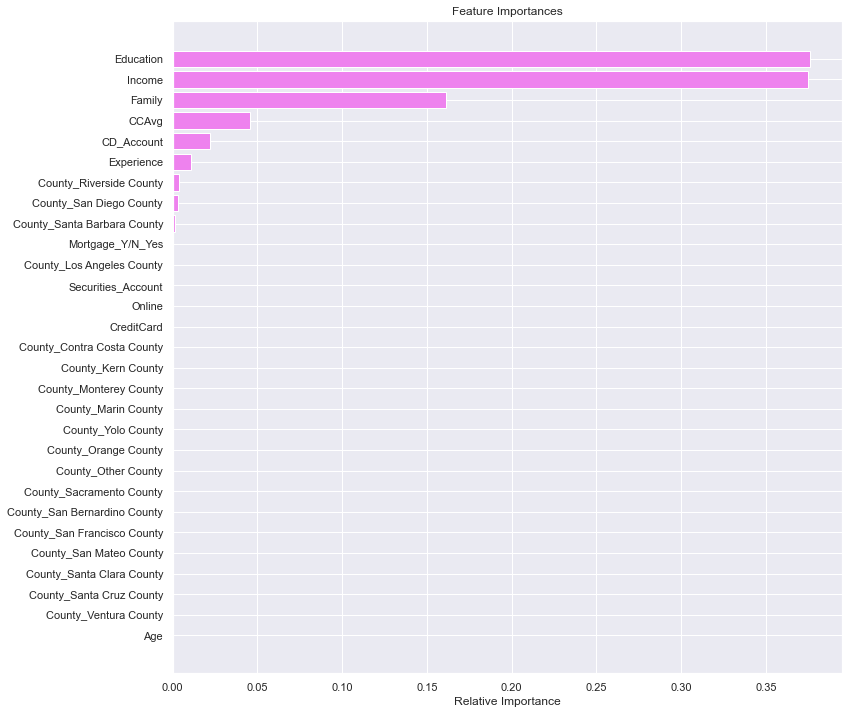

<IPython.core.display.Javascript object>

In [142]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observatons**

- In tuned decision tree Education and Income are the most important features, followed by Family size

## Cost Complexity Pruning

In [143]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [144]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-5.867287e-15
1,7.482671e-19,-5.866539e-15
2,1.496534e-18,-5.865043e-15
3,3.499249e-18,-5.861543e-15
4,3.521257e-18,-5.858022e-15
5,5.391925e-18,-5.852630e-15
6,5.832082e-18,-5.846798e-15
7,9.478050e-18,-5.837320e-15
8,1.143528e-16,-5.722967e-15
9,1.273551e-15,-4.449416e-15


<IPython.core.display.Javascript object>

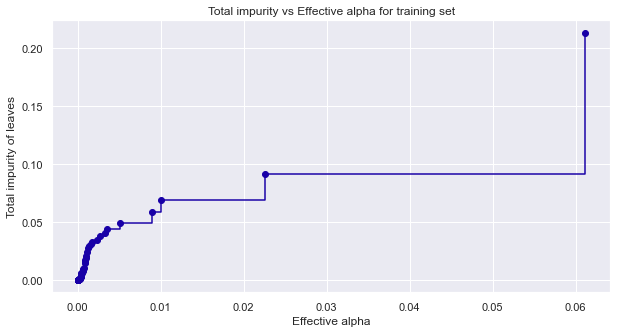

<IPython.core.display.Javascript object>

In [145]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total impurity vs Effective alpha for training set")
plt.show()

- We need to train the decision tree using the effective alphas. The last value in the alphas is the alpha value that prunes the whole tree, leaving the tree clfs[-1], with one node

In [146]:
# Training the decision tree using the effective alphas

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(
    "Number of nodes in the last tree is : {} with ccp_alpha : {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is : 1 with ccp_alpha : 0.2537957148948112


<IPython.core.display.Javascript object>

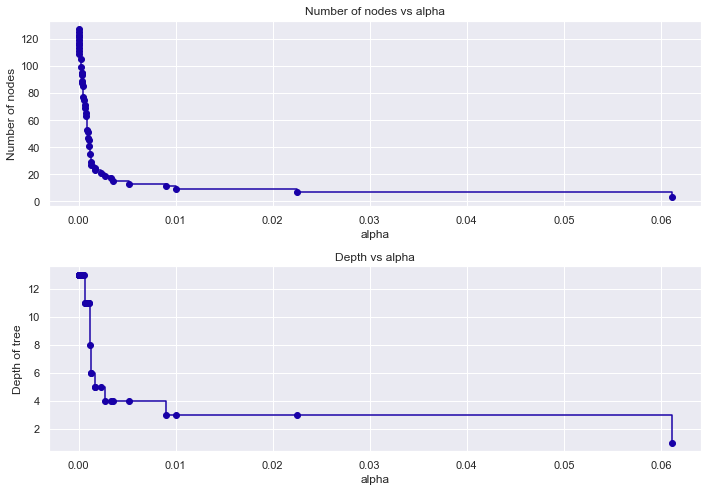

<IPython.core.display.Javascript object>

In [147]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [148]:
recall_train = []

for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [149]:
recall_test = []

for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [150]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

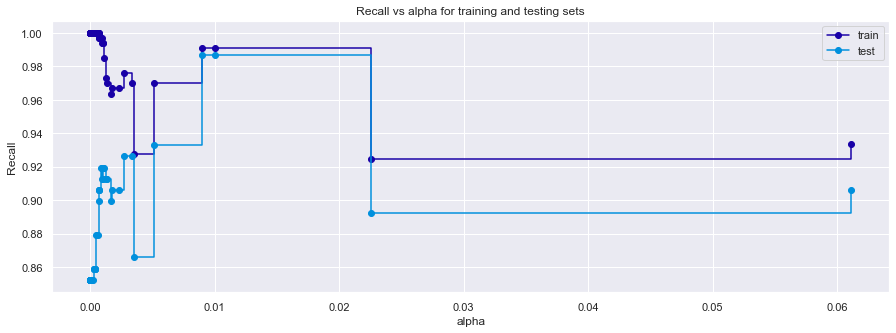

<IPython.core.display.Javascript object>

In [151]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- The maximum value of Recall is around 0.01 alpha, for both train and test sets

In [152]:
# Creating the model where we get highest train and test recall

index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.009008434301508078,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

In [153]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.009008434301508078,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Model performance on training set

In [154]:
decision_tree_postpruned_perf_train = model_performance_classification(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.935143,0.990937,0.594203,0.742922


<IPython.core.display.Javascript object>

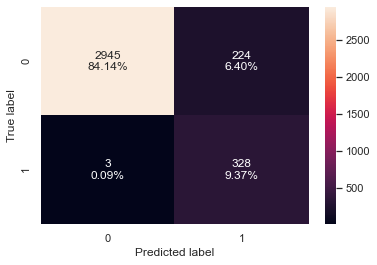

<IPython.core.display.Javascript object>

In [155]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Model performance on test set

In [156]:
decision_tree_postpruned_perf_test = model_performance_classification(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.939333,0.986577,0.622881,0.763636


<IPython.core.display.Javascript object>

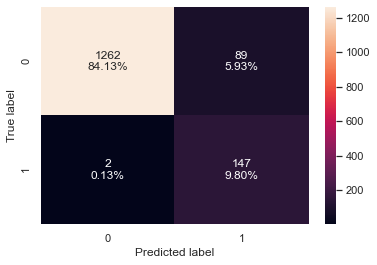

<IPython.core.display.Javascript object>

In [157]:
confusion_matrix_sklearn(best_model, X_test, y_test)

**Observations**

- The results have improved from the initial model
- The model is giving a generalized performance on training and test set

### Visualizing the Decision Tree

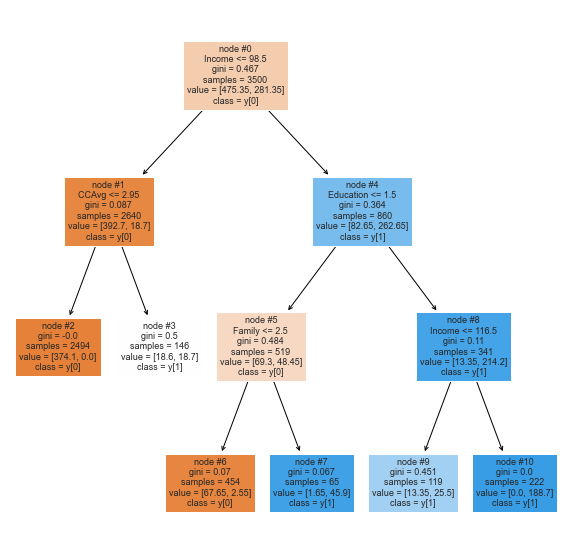

<IPython.core.display.Javascript object>

In [158]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [159]:
# Text report showing the rules of a decision tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.60, 18.70] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.35, 25.50] class: 1
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 188.70] class: 1



<IPython.core.display.Javascript object>

In [160]:
# Gini importance of features in the tree building

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Income                        0.645704
Family                        0.158240
Education                     0.140915
CCAvg                         0.055142
Age                           0.000000
County_Riverside County       0.000000
County_Yolo County            0.000000
County_Ventura County         0.000000
County_Santa Cruz County      0.000000
County_Santa Clara County     0.000000
County_Santa Barbara County   0.000000
County_San Mateo County       0.000000
County_San Francisco County   0.000000
County_San Diego County       0.000000
County_San Bernardino County  0.000000
County_Sacramento County      0.000000
County_Monterey County        0.000000
County_Other County           0.000000
County_Orange County          0.000000
Experience                    0.000000
County_Marin County           0.000000
County_Los Angeles County     0.000000
County_Kern County            0.000000
County_Contra Costa County    0.000000
CreditCard               

<IPython.core.display.Javascript object>

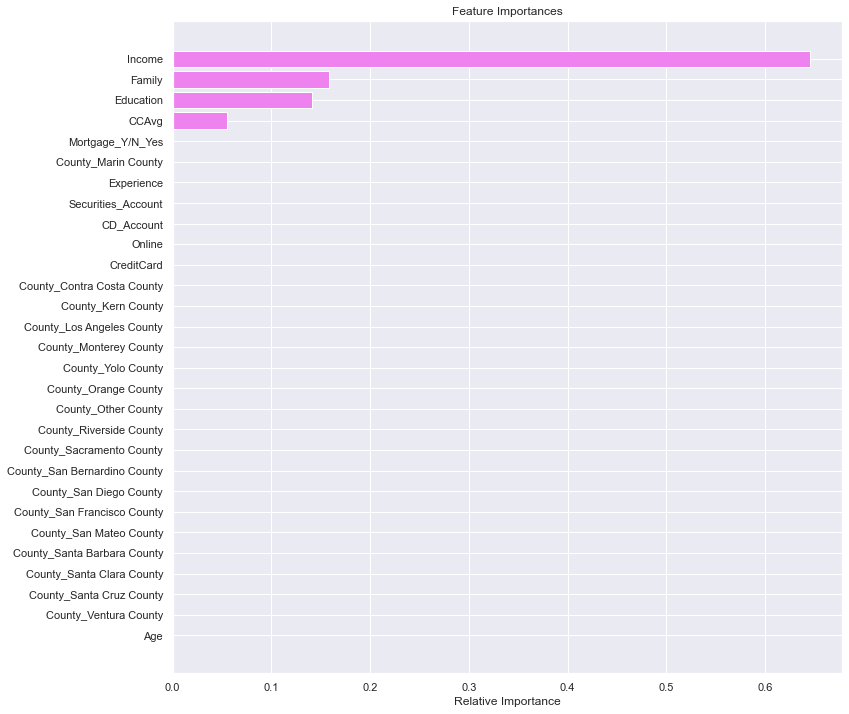

<IPython.core.display.Javascript object>

In [161]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

- Income is the most important feature to predict if the customer will borrow a personal loan
- Followed by Family size, Education and the CCAvg

In [162]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison : ")
models_train_comp_df

Training performance comparison : 


,Decision Tree Sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.992000,0.935143
Recall,1.0,0.963746,0.990937
Precision,1.0,0.952239,0.594203
F1,1.0,0.957958,0.742922


<IPython.core.display.Javascript object>

In [163]:
# Test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree Sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison : ")
models_test_comp_df

Test performance comparison : 


,Decision Tree Sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.974667,0.979333,0.939333
Recall,0.852349,0.885906,0.986577
Precision,0.888112,0.904110,0.622881
F1,0.869863,0.894915,0.763636


<IPython.core.display.Javascript object>

## Conclusion

- Decision tree model with pre-pruning has given the best recall score on training data
- Decision tree model with post-pruning has given the best recall score on test set
- The tree with post pruning is not complex and is easy to interpret

# Logistic Regression and Decision Tree

## Model comparison

**Logistic Regression**

- Outliers were treated
- Variables with multicollinearity and a p>0.05 were dropped in the process of model building
- Highest Recall in the test set is 0.89, with a threshold of 0.079, allowing comparable values in train and test sets
- Able to interpret that a unit increase in any of the variables (Income, Family, CCAvg, CD_Account, Education levels, Riverside County) will increase the odds of a customer taking a personal loan

**Decision Tree**

- Outliers and multicollinear variables were not treated since they have no effect on the Decision Tree
- Highest Recall in the test set is 0.986, with a post-pruned decision tree, giving comparable values in both train and test sets
- Able to interpret that Income, Family, Education and CCAvg hold more importance in predicting if a customer will borrow a personal loan

# Recommendations

**The marketing team should target customers with . . .**

- An average annual income above 120K doallars
- Education levels graduate and advanced / professional
- A family size of three and above
- Certificate of deposit account in the bank
- A higher spending rate on credit cards (>2.5K dollars per month)
- House mortgage in general
- Age above 35 years
- Experience above nine years for better outcomes
- And customers from LA, Santa Clara, San Diego and Riverside Counties for favorable effects